## Download a csv from a jupyter notebook

In [ ]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Aggregations with GroupBy

## Practice GroupBy operations with Video Games Sales data

### Introduction

This lab focuses on grouping and aggregation using the Video Games Sales dataset. You'll be working with the dataset to practice the following skills:

- Grouping the data based on one or multiple columns using the groupby function.
- Applying built-in functions like ``mean``, ``sum``, ``size``, and describe to aggregated groups.
- Using different aggregation functions for different columns using ``.agg`` or ``.aggregate``, including custom defined functions.
- Applying advanced custom functions using ``.apply``.
- Utilizing the ``.transform`` function to apply transformations to groups while preserving the original DataFrame shape.

### The Dataset used

For this lab, we will be using the Video Games Sales dataset from Kaggle. The dataset contains information about video game sales, including the game title, platform, genre, publisher, and sales figures in different regions. It provides a comprehensive overview of the video game industry.

### Analysis and activities

In this lab, you will apply grouping and aggregation techniques to answer various questions about the video game sales dataset. You will group the data by different columns, calculate statistics such as mean and sum, analyze trends over time, identify top performers, and explore regional preferences for platforms, genres, and publishers.

Begin by going through the reading material and analysis sections of the lab notebook. Once you feel comfortable, proceed to the activities section to practice your skills and gain a deeper understanding of grouping and aggregating data with pandas.

In [1]:
import pandas as pd

In [2]:
games_sales_df = pd.read_csv('files/vgsales.csv')

In [3]:
games_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Discovering the dataset

In [4]:
#show the number of cells in the dataframe
print("video games dataframe size: ", games_sales_df.size)

#show the number of records (rows) in the dataframe
print("number of games: ", len(games_sales_df))

video games dataframe size:  182578
number of games:  16598


In [5]:
games_sales_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

1. Calculate the total global sales for each ``Platform``

    Store the resulting series in the variable ``total_global_sales_by_platform``.

In [6]:
total_global_sales_by_platform = games_sales_df.groupby(['Platform']).sum()['Global_Sales']
total_global_sales_by_platform

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

2. Find the top-selling genre based on global sales

    Note: The top-selling genre is the genre that has the maximum sum of ``Global_Sales``.

In [7]:
top_selling_genre = games_sales_df.groupby(['Genre']).sum()['Global_Sales'].sort_values(ascending = False)

In [8]:
games_sales_df.groupby('Genre')['Global_Sales'].sum().idxmax()

'Action'

3. Create a bar chart to visualize the sum of ``Global_Sales`` per ``Genre``

    Store the resulting chart in the variable ``global_sales_chart``.

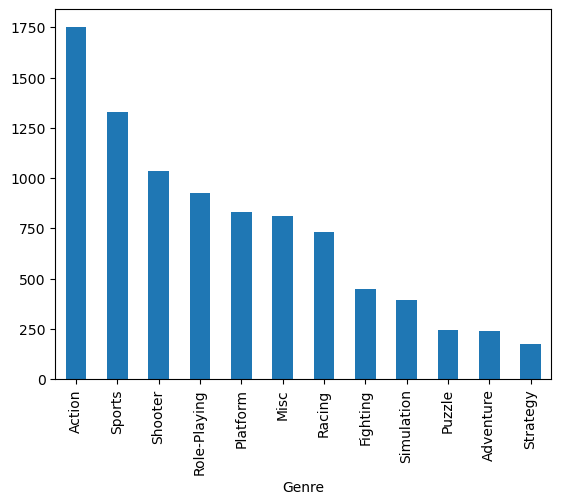

In [9]:
global_sales_chart = top_selling_genre.plot(kind = 'bar')

4. Calculate the average global sales for each ``Publisher``

    Store the resulting dataframe in the variable ``avg_sales_per_publisher``.

In [10]:
avg_sales_per_publisher = games_sales_df.groupby(['Publisher'])['Global_Sales'].mean().reset_index()
avg_sales_per_publisher

,Publisher,Global_Sales
0,10TACLE Studios,0.036667
1,1C Company,0.033333
2,20th Century Fox Video Games,0.388000
3,2D Boy,0.040000
4,3DO,0.281111
...,...,...
573,id Software,0.030000
574,imageepoch Inc.,0.020000
575,inXile Entertainment,0.100000
576,"mixi, Inc",0.860000


5. Calculate the total ``EU_Sales`` for each platform-year combination

    Store the resulting series in the variable ``platform_year_eu_sales``.

In [11]:
platform_year_eu_sales = games_sales_df.groupby(['Platform', 'Year'])['EU_Sales'].sum()
platform_year_eu_sales

Platform  Year  
2600      1980.0     0.67
          1981.0     1.96
          1982.0     1.65
          1983.0     0.34
          1984.0     0.01
                    ...  
XB        2008.0     0.04
XOne      2013.0     5.29
          2014.0    17.75
          2015.0    17.98
          2016.0     4.63
Name: EU_Sales, Length: 241, dtype: float64

6. Find the number of publishers in each ``Platform``

    Calculate the number of publishers within each "Platform" and store the resultant dataframe in the variable ``no_publisher_per_platform``. The "Publishers_Count" column in ``no_publisher_per_platform`` should store the publisher count.

In [12]:
no_publisher_per_platform = games_sales_df.groupby(['Platform'])['Publisher'].nunique().reset_index(name = 'Publishers_Count')#.rename(columns={'Publisher':'Publishers_Count'})
no_publisher_per_platform

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


Otra solución

In [13]:
games_sales_df.groupby('Platform')['Publisher'].apply(lambda x: x.nunique()).reset_index(name='Publishers_Count')

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


7. Find the publisher with the most occurences for each ``Platform``

    Store the resulting dataframe in the variable ``most_frequent_publisher_platform``.

    Note: return the publisher with the smallest lexicographical name in case there is a tie in the number of occurences.

In [14]:
most_frequent_publisher_platform = games_sales_df.groupby('Platform')['Publisher'].agg(lambda x: x.mode().min()).reset_index()
most_frequent_publisher_platform

,Platform,Publisher
0,2600,Atari
1,3DO,Imageworks
2,3DS,Namco Bandai Games
3,DC,Sega
4,DS,Ubisoft
5,GB,Nintendo
6,GBA,THQ
7,GC,Electronic Arts
8,GEN,Sega
9,GG,Sega


8. Find the publisher with the highest total global sales for each ``Year``

    Store the resulting dataframe in the variable ``top_publisher_year``.

In [15]:
top_publisher_year = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index().sort_values(['Year', 'Global_Sales'], ascending = True).drop_duplicates('Year',keep='last').reset_index(drop= True)
top_publisher_year.rename(columns={'Publisher':'Top_Selling_Publisher','Global_Sales':'Global_Sales_Sum'}, inplace = True)

Otra solución

In [16]:
yearly_publisher_sales = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum()
yearly_publisher_sales

Year    Publisher                   
1980.0  Activision                      3.02
        Atari                           8.36
1981.0  20th Century Fox Video Games    1.35
        Activision                      8.50
        Atari                           8.45
                                        ... 
2016.0  Yeti                            0.02
        dramatic create                 0.03
2017.0  Idea Factory                    0.01
        Sega                            0.04
2020.0  Ubisoft                         0.29
Name: Global_Sales, Length: 2321, dtype: float64

In [17]:
top_publisher_year = yearly_publisher_sales.groupby('Year').idxmax().apply(lambda x: x[1]).reset_index(name='Top_Selling_Publisher')
top_publisher_year

,Year,Top_Selling_Publisher
0,1980.0,Atari
1,1981.0,Activision
2,1982.0,Atari
3,1983.0,Nintendo
4,1984.0,Nintendo
5,1985.0,Nintendo
6,1986.0,Nintendo
7,1987.0,Nintendo
8,1988.0,Nintendo
9,1989.0,Nintendo


In [18]:
top_publisher_year['Global_Sales_Sum'] = top_publisher_year.apply(lambda row: yearly_publisher_sales.loc[row['Year'], row['Top_Selling_Publisher']], axis=1)

In [19]:
top_publisher_year

,Year,Top_Selling_Publisher,Global_Sales_Sum
0,1980.0,Atari,8.36
1,1981.0,Activision,8.50
2,1982.0,Atari,19.43
3,1983.0,Nintendo,10.96
4,1984.0,Nintendo,45.56
5,1985.0,Nintendo,49.95
6,1986.0,Nintendo,16.18
7,1987.0,Nintendo,11.95
8,1988.0,Nintendo,36.44
9,1989.0,Nintendo,63.88


9. Find the maximum sales year for each ``Genre``

    Store the resulting dataframe in the variable ``max_sales_year_per_genre``.

In [16]:
genre = games_sales_df.groupby(['Genre', 'Year'])['Global_Sales'].max().reset_index()
max_sales_year_per_genre = genre.sort_values(['Genre','Global_Sales'], ascending=True).drop_duplicates('Genre', keep='last')
max_sales_year_per_genre = max_sales_year_per_genre.sort_values('Global_Sales', ascending=False).reset_index(drop = True)
max_sales_year_per_genre

,Genre,Year,Global_Sales
0,Sports,2006.0,82.74
1,Platform,1985.0,40.24
2,Racing,2008.0,35.82
3,Role-Playing,1996.0,31.37
4,Puzzle,1989.0,30.26
5,Misc,2006.0,29.02
6,Shooter,1984.0,28.31
7,Simulation,2005.0,24.76
8,Action,2013.0,21.40
9,Fighting,2008.0,13.04


Otra solución

In [17]:
max_sales_year_per_genre = games_sales_df.groupby('Genre')['Global_Sales'].idxmax()
max_sales_year_per_genre = games_sales_df.loc[max_sales_year_per_genre, ['Genre', 'Year', 'Global_Sales']]
max_sales_year_per_genre

,Genre,Year,Global_Sales
16,Action,2013.0,21.40
50,Adventure,1992.0,11.18
39,Fighting,2008.0,13.04
7,Misc,2006.0,29.02
1,Platform,1985.0,40.24
5,Puzzle,1989.0,30.26
2,Racing,2008.0,35.82
4,Role-Playing,1996.0,31.37
9,Shooter,1984.0,28.31
10,Simulation,2005.0,24.76


10. Compute descriptive statistics for each Genre using its ``Global_Sales``

    Store the resulting dataframe in the variable ``descriptive_genres``.

In [18]:
descriptive_genres = games_sales_df.groupby('Genre')['Global_Sales'].describe()
descriptive_genres

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


11. Calculate the total ``JP_Sales`` and average ``Other_Sales`` for each Platform

    Store the resulting dataframe in the variable ``jp_other_sales_platform``.

In [19]:
jp_other_sales_platform = games_sales_df.groupby('Platform').agg({'JP_Sales':'sum', 'Other_Sales':'mean'})
jp_other_sales_platform 

,JP_Sales,Other_Sales
Platform,,
2600,0.00,0.006842
3DO,0.10,0.000000
3DS,97.35,0.024813
DC,8.56,0.005192
DS,175.57,0.027984
GB,85.12,0.083673
GBA,47.33,0.009404
GC,21.58,0.009317
GEN,2.67,0.032963


12. Calculate the range (max-min) of ``NA_Sales`` for each ``Publisher``

    Store the resulting series in the variable ``max_min_diff_NAsales_per_publisher``.

In [20]:
def _range(series):
    return series.max() - series.min()

max_min_diff_NAsales_per_publisher = games_sales_df.groupby('Publisher')['NA_Sales'].agg(_range)
max_min_diff_NAsales_per_publisher

Publisher
10TACLE Studios                 0.06
1C Company                      0.01
20th Century Fox Video Games    0.53
2D Boy                          0.00
3DO                             1.09
                                ... 
id Software                     0.00
imageepoch Inc.                 0.00
inXile Entertainment            0.00
mixi, Inc                       0.00
responDESIGN                    0.05
Name: NA_Sales, Length: 578, dtype: float64

13. Calculate the percentage of ``Global_Sales`` contribution by each ``Platform``

    Store the resulting dataframe in the variable ``sales_percentage_by_platform``.

In [21]:
games_sales_df.groupby('Platform')['Global_Sales'].sum()

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

In [22]:
sales_percentage_by_platform = games_sales_df.groupby('Platform').agg(sales_percentage = ('Global_Sales', 'sum')).reset_index()
sales_percentage_by_platform['sales_percentage'] = sales_percentage_by_platform['sales_percentage'] / games_sales_df['Global_Sales'].sum() * 100
sales_percentage_by_platform

,Platform,sales_percentage
0,2600,1.088287
1,3DO,0.001121
2,3DS,2.774078
3,DC,0.179027
4,DS,9.220285
5,GB,2.863648
6,GBA,3.570452
7,GC,2.234867
8,GEN,0.317922
9,GG,0.000448


Otra solución

In [23]:
sales_by_platform = games_sales_df.groupby('Platform')['Global_Sales'].sum()
sales_percentage_by_platform = sales_by_platform.apply(lambda x: (x/sales_by_platform.sum())*100).reset_index(name='sales_percentage')

14. Which platforms for playing video games have been the most popular each year?

    Store the resulting series in the variable ``popular_platform_per_year``.

In [24]:
yearly_platform_sales = games_sales_df.groupby(['Year', 'Platform'])['Global_Sales'].sum()
top_platform_year = yearly_platform_sales.groupby('Year').idxmax().apply(lambda x: x[1])
top_platform_year

Year
1980.0    2600
1981.0    2600
1982.0    2600
1983.0     NES
1984.0     NES
1985.0     NES
1986.0     NES
1987.0     NES
1988.0     NES
1989.0      GB
1990.0    SNES
1991.0    SNES
1992.0    SNES
1993.0    SNES
1994.0    SNES
1995.0      PS
1996.0      PS
1997.0      PS
1998.0      PS
1999.0      PS
2000.0      PS
2001.0     PS2
2002.0     PS2
2003.0     PS2
2004.0     PS2
2005.0     PS2
2006.0     Wii
2007.0     Wii
2008.0     Wii
2009.0     Wii
2010.0    X360
2011.0     PS3
2012.0     PS3
2013.0     PS3
2014.0     PS4
2015.0     PS4
2016.0     PS4
2017.0     PS4
2020.0      DS
Name: Global_Sales, dtype: object

15. Which genres have been more or less popular with the passing of time?

    Store the resulting dataframe in the variable ``genre_popularity_over_time``.

In [25]:
genre_popularity_over_time = games_sales_df.groupby(['Year', 'Genre'])['Genre'].count().unstack(fill_value = 0)
genre_popularity_over_time

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,1,0
1981.0,25,0,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,1,5,3,2,0,5,0,2,0
1983.0,7,1,0,1,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,1,3,3,0,3,0,2,0
1985.0,2,0,1,0,4,4,0,0,1,1,1,0
1986.0,6,0,0,0,6,0,1,1,4,0,3,0
1987.0,2,1,2,0,2,0,0,3,2,0,4,0
1988.0,2,0,0,0,4,1,1,3,1,1,2,0


16. Calculate the z-score normalization for ``Global_Sales`` for each ``Genre``

    Store the result in a new column ``Global_Sales_Normalized`` in the original dataframe ``games_sales_df``.

In [29]:
zscore = lambda x: (x - x.mean()) / x.std()

t = games_sales_df.groupby('Genre')['Global_Sales'].transform(zscore)

games_sales_df['Global_Sales_Normalized'] = t

t

0        39.322418
1        15.202241
2        21.194126
3        15.520139
4        18.002581
           ...    
16593    -0.359091
16594    -0.430254
16595    -0.346540
16596    -0.263093
16597    -0.359091
Name: Global_Sales, Length: 16598, dtype: float64

In [28]:
games_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Normalized
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,39.322418
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,15.202241
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,21.194126
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15.520139
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,18.002581
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,-0.359091
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,-0.430254
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,-0.346540
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,-0.263093


## Practice PivotTables and Crosstab with Student Grades data

In this project, students will explore essential concepts and techniques in data analysis using Pandas Pivot Table and CrossTab. They will cover the following topics:

1. Simple Pivot Tables: Grouping data based on an index column.
2. Index, Columns, and Values: Adding columns and values to gain deeper insights.
3. Different Types of Functions: Applying various aggregation functions.
4. Fill Values: Handling missing data in Pivot Tables.
5. Pivot Tables with Margins: Including row and column totals.
6. CrossTab: Utilizing a simpler alternative for specific scenarios.

Through hands-on activities, students will develop the skills to perform effective data analysis and make informed decisions using Pandas.

#### The Dataset used

For this project we wil use students records dataset. The dataset contains information about students' academic performance and personal attributes. The dataset includes various features such as school, sex, age, address, family size, parental education levels, study time, travel time, failures, extracurricular activities, internet access, romantic relationships, health status, absences, and grades in different subjects (G1, G2, G3).

#### Analysis and activities

Your job will be to practice wrangling these different datframes to answer questions about students.

Start the associated lab, go over the Reading and Analysis parts of the notebook, and once you're ready, jump to the activities!

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Reading the dataset as a dataframe# Reading the dataframe
student_mat_df = pd.read_csv("files/student-mat.csv")

In [3]:
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Show the number of students in each school
print("Number of students in GP: ", student_mat_df[student_mat_df['school'] == 'GP'].size)

print("Number of students in MS: ", student_mat_df[student_mat_df['school'] == 'MS'].size)

Number of students in GP:  11517
Number of students in MS:  1518


In [5]:
student_mat_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

1. Calculate the average G1 grade by mother job (``Mjob``).

    Store the resulting dataframe in the variable ``pivot_table_g1_by_Mjob``.

In [6]:
pivot_table_g1_by_Mjob = pd.pivot_table(student_mat_df,    
                                        index = ['Mjob'],
                                        values= ['G1']
                                        )
                                        

pivot_table_g1_by_Mjob

,G1
Mjob,
at_home,10.457627
health,12.205882
other,10.177305
services,11.388350
teacher,11.534483


2. Calculate the average G2 grade by school and sex.

    Store the resulting dataframe in the variable ``pivot_table_avg_g2_by_school_sex``.

In [7]:
pivot_table_avg_g2_by_school_sex = pd.pivot_table(student_mat_df,
                                                  values = 'G2',
                                                  columns = 'sex',
                                                  index = 'school')
pivot_table_avg_g2_by_school_sex

sex,F,M
school,,
GP,10.398907,11.204819
MS,10.320000,10.047619


3. Calculate the maximum G3 grade by age.

    Store the resulting dataframe in the variable ``pivot_table_max_g3_by_age``.

In [8]:
pivot_table_max_g3_by_age = pd.pivot_table(student_mat_df,
                                                  values = 'G3',
                                                  index = 'age',
                                                  aggfunc = 'max')
pivot_table_max_g3_by_age

,G3
age,
15,19
16,20
17,18
18,19
19,13
20,18
21,7
22,8


4. Calculate the average health (``health``) by family size (``famsize``) and fill missing values with ``0``.

    Store the resulting dataframe in the variable ``pivot_table_avg_g1_by_famsize``.

In [9]:
pivot_table_avg_g1_by_famsize = pd.pivot_table(student_mat_df,
                                               values = 'health',
                                               index = 'famsize',
                                               fill_value = 0)
pivot_table_avg_g1_by_famsize

,health
famsize,
GT3,3.580071
LE3,3.491228


5. Calculate the average G2 grade by school and include row and column totals.

    Store the resulting dataframe in the variable ``pivot_table_avg_g2_by_school``.

In [10]:
pivot_table_avg_g2_by_school = student_mat_df.pivot_table(index = 'school',
                                                          values = 'G2',
                                                          margins = True)
pivot_table_avg_g2_by_school                                                          

,G2
school,
GP,10.782235
MS,10.195652
All,10.713924


6. Calculate the average free time ``freetime`` indexing school wiht sex and age columns

    Store the resulting dataframe in the variable ``pivot_table_avg_freetime_by_school_sex_age``.

    - Note: fill missing values with ``0``.

In [11]:
pivot_table_avg_freetime_by_school_sex_age = student_mat_df.pivot_table(values='freetime',
                                                                        index = 'school',
                                                                        columns = ['sex', 'age'],
                                                                        fill_value = 0)

pivot_table_avg_freetime_by_school_sex_age

sex            F                                                  M        \
age           15        16    17        18        19   20        15    16   
school                                                                      
GP      2.921053  3.092593  2.94  3.172414  2.833333  0.0  3.590909  3.38   
MS      0.000000  0.000000  3.25  2.785714  3.000000  4.0  0.000000  0.00   

sex                                                  
age           17        18        19   20   21   22  
school                                               
GP      3.472222  3.142857  4.166667  5.0  0.0  4.0  
MS      4.500000  3.363636  3.250000  5.0  5.0  0.0

7. Calculate the average absences by school and address.

    Store the resulting dataframe in the variable ``pivot_table_avg_absences_by_school_address``.

In [13]:
pivot_table_avg_absences_by_school_address = student_mat_df.pivot_table(index = ['school', 'address'],
                                                                        values = 'absences')
pivot_table_avg_absences_by_school_address

absences
school address          
GP     R        6.698413
       U        5.804196
MS     R        4.680000
       U        2.666667

8. Calculate the average freetime and number of absences by school.

    Store the resulting dataframe in the variable ``pivot_table_avg_freetime_absences_by_school``.

    Your result should look similar to this dataframe:

In [17]:
pivot_table_avg_freetime_absences_by_school = student_mat_df.pivot_table(index = 'school',
                                                                         values = ['absences', 'freetime'],
                                                                         aggfunc = {'absences' : 'sum', 'freetime' : 'mean'})
pivot_table_avg_freetime_absences_by_school

,absences,freetime
school,,
GP,2082,3.223496
MS,173,3.326087


9. Calculate the sum of absences by guardian.

    Store the resulting dataframe in the variable ``pivot_table_sum_absences_by_guardian``.

In [18]:
pivot_table_sum_absences_by_guardian = student_mat_df.pivot_table(index = 'guardian',
                                                                 values = 'absences',
                                                                 aggfunc = 'sum')

pivot_table_sum_absences_by_guardian

,absences
guardian,
father,358
mother,1593
other,304


10. Calculate the average G1 grade by school.

    Store the resulting dataframe in the variable ``pivot_table_avg_g1_by_school``.

In [20]:
pivot_table_avg_g1_by_school = student_mat_df.pivot_table(index = 'school',
                                                          values = 'G1')
pivot_table_avg_g1_by_school                                                          

,G1
school,
GP,10.939828
MS,10.673913


11. Count the number of students by guardian and age and include sex as column.

    Store the resulting dataframe in the variable ``cross_tab_students_by_guardian_age_sex``.

In [32]:
cross_tab_students_by_guardian_age_sex = student_mat_df.pivot_table(index = ['guardian', 'age'],
                                                                    columns = ['sex'],
                                                                    values = 'school',
                                                                    aggfunc = 'count',
                                                                    fill_value = 0
                                                                    )

cross_tab_students_by_guardian_age_sex

sex            F   M
guardian age        
father   15   11  13
         16    9  14
         17   15  10
         18    8   8
         19    0   2
mother   15   26  29
         16   44  35
         17   43  29
         18   31  31
         19    1   3
         22    0   1
other    15    1   2
         16    1   1
         17    0   1
         18    4   0
         19   13   5
         20    1   2
         21    0   1

Usando ``crosstab`` sería así:

In [33]:
cross_tab_students_by_guardian_age_sex = pd.crosstab(
    index=[student_mat_df['guardian'], student_mat_df['age']],   # Index columns (school and age)
    columns=student_mat_df['sex'],                             # Column column (sex)
    rownames=['Guardian', 'Age'],                                 # Names for the index
    colnames=['Sex'],                                           # Name for the columns
    margins=False                                               # Exclude row and column totals
)

cross_tab_students_by_guardian_age_sex


Sex            F   M
Guardian Age        
father   15   11  13
         16    9  14
         17   15  10
         18    8   8
         19    0   2
mother   15   26  29
         16   44  35
         17   43  29
         18   31  31
         19    1   3
         22    0   1
other    15    1   2
         16    1   1
         17    0   1
         18    4   0
         19   13   5
         20    1   2
         21    0   1

12. Count the number of students by school, and include sex and age as columns and include row and column totals.

    Store the resulting dataframe in the variable ``cross_tab_students_by_school_sex_age``.

In [39]:
cross_tab_students_by_school_sex_age = pd.crosstab(
    index = student_mat_df['school'],
    columns = [student_mat_df['sex'], student_mat_df['age']],
    rownames = ['School'],
    colnames = ['Sex','Age'],
    margins = True
)

cross_tab_students_by_school_sex_age

Sex      F                      M                           All
Age     15  16  17  18  19 20  15  16  17  18  19 20 21 22     
School                                                         
GP      38  54  50  29  12  0  44  50  36  28   6  1  0  1  349
MS       0   0   8  14   2  1   0   0   4  11   4  1  1  0   46
All     38  54  58  43  14  1  44  50  40  39  10  2  1  1  395

13. Calculate the average travel time (``traveltime``) by address, sex, and age.

    Store the resulting dataframe in the variable ``crosstab_avg_traveltime_by_address_sex_age``.

In [61]:
crosstab_avg_traveltime_by_address_sex_age = pd.crosstab(
    index = [student_mat_df['address'],student_mat_df['sex'],student_mat_df['age']],
    values = student_mat_df['traveltime'],
    columns = '',
    rownames = ['Address', 'Sex', 'Age'],
    colnames = [''],
    aggfunc = 'mean')

crosstab_avg_traveltime_by_address_sex_age

Address Sex Age          
R       F   15   1.555556
            16   1.333333
            17   1.600000
            18   2.285714
            19   1.000000
        M   15   2.166667
            16   1.875000
            17   2.166667
            18   1.846154
            19   2.250000
            21   1.000000
U       F   15   1.275862
            16   1.333333
            17   1.255814
            18   1.344828
            19   1.454545
            20   2.000000
        M   15   1.263158
            16   1.404762
            17   1.392857
            18   1.346154
            19   1.166667
            20   1.000000
            22   1.000000

14. Count the number of students who have participated in extracurricular activities by school and sex.

    Store the resulting dataframe in the variable ``crosstab_activities_by_school_sex``.

In [76]:
crosstab_activities_by_school_sex  = pd.crosstab(
    index = [student_mat_df['school'],student_mat_df['sex']],
    rownames = ['School', 'Sex'],
    values = student_mat_df['activities'],
    columns = '',
    colnames = [''],
    aggfunc = lambda x: (x == 'yes').sum(),
    margins=False

)

crosstab_activities_by_school_sex 

School Sex    
GP     F    86
       M    99
MS     F    10
       M     6

15. Calculate the percentage of students who have internet access, categorized by school and sex.

    Store the resulting dataframe in the variable ``crosstab_internet_access_by_school_sex``.

In [97]:
crosstab_internet_access_by_school_sex = pd.crosstab(
    index = student_mat_df['school'],
    rownames = ['School'],
    values = student_mat_df['internet'],
    columns = student_mat_df['sex'],
    aggfunc = lambda x: (x == 'yes').sum() / len(x)
)

crosstab_internet_access_by_school_sex

sex,F,M
School,,
GP,0.836066,0.867470
MS,0.680000,0.714286


## Practice GroupBy operations with Netflix data

### Introduction

In this project, students will learn essential concepts and techniques for data analysis using grouping in Pandas. Specifically, they will explore:

- Grouping by a single column and performing operations such as ``mean``, ``size``, and ``std``.
- Grouping by multiple columns to gain insights from combined factors.
- Applying built-in functions to aggregate data in different ways for different columns using ``.agg()`` or ``.aggregate()``.
- Implementing and using custom-defined functions to perform advanced calculations on grouped data.
- Utilizing ``.apply()`` to apply custom functions and construct DataFrames from the resulting series.
- Employing ``.transform()`` to apply transformations on grouped data.

By mastering these concepts, students will gain a solid foundation in using Pandas for effective data analysis and manipulation.

**The Dataset used**

For this project we wil use The Netflix TV Shows and Movies dataset. The Netflix TV Shows and Movies dataset is a comprehensive collection of information about TV shows and movies available on the popular streaming platform Netflix. The dataset provides details about each title, including details such as type, description, release year, genres, ratings, and more. With thousands of entries, this dataset offers a rich source of information for exploring and analyzing the vast variety of content available on Netflix.

In [69]:
import pandas as pd

In [70]:
# Reading dataframe
titles_df = pd.read_csv("files/titles.csv")

In [71]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [72]:
# Show the number of movies and shows
print("Number of movies and shows: ", len(titles_df))

# Show the first year Netflix produced a movie or a show
print("The first time Netflix  produced a movie or a show was in: ", titles_df['release_year'][0])



Number of movies and shows:  5850
The first time Netflix  produced a movie or a show was in:  1945


In [73]:
titles_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

### Cleaning

1. Drop records where the ``imdb_score`` column has missing values (NaN)

In [74]:
titles_df.dropna(subset='imdb_score', inplace=True)

2. For each TV show or movie which has NaN value in the age certification column, replace it to be 'No certification'

In [75]:
titles_df['age_certification'].fillna(value = 'No certification', inplace = True)

3. For each TV show or movie which has NaN value in the seasons column, replace it to be the most occured value in the seasons

In [76]:
titles_df['seasons'].fillna(value = 1.0 , inplace = True)

4. Count the number of movies or TV shows for each age certification

    Store the resulting dataframe in the variable ``certification_counts``.

In [77]:
certification_counts = titles_df.groupby(['age_certification'])['id'].count().reset_index().rename(columns= {'id' : 'count'})
certification_counts

,age_certification,count
0,G,99
1,NC-17,15
2,No certification,2335
3,PG,223
4,PG-13,435
5,R,530
6,TV-14,441
7,TV-G,75
8,TV-MA,833
9,TV-PG,173


In [78]:
titles_df.groupby("age_certification").size().reset_index(name="count")

,age_certification,count
0,G,99
1,NC-17,15
2,No certification,2335
3,PG,223
4,PG-13,435
5,R,530
6,TV-14,441
7,TV-G,75
8,TV-MA,833
9,TV-PG,173


5. Count the number of movies and TV shows (seperately) produced in each release year

    Store the resulting dataframe in the variable ``count_by_release_year``.

In [79]:
count_by_release_year = titles_df.groupby(['release_year', 'type']).size().reset_index(name = 'count')
count_by_release_year

,release_year,type,count
0,1954,MOVIE,2
1,1956,MOVIE,1
2,1958,MOVIE,1
3,1959,MOVIE,1
4,1960,MOVIE,1
...,...,...,...
97,2020,SHOW,257
98,2021,MOVIE,429
99,2021,SHOW,289
100,2022,MOVIE,180


6. Calculate the average runtime and imdb score of movies and TV shows for each release year

    Store the resulting dataframe in the variable ``average_duration_imdb_score``.

In [80]:
average_duration_imdb_score = titles_df.groupby('release_year').agg({'runtime' : 'mean','imdb_score' : 'mean' }).reset_index()

average_duration_imdb_score

,release_year,runtime,imdb_score
0,1954,107.500000,7.450000
1,1956,120.000000,6.700000
2,1958,77.000000,7.500000
3,1959,142.000000,6.600000
4,1960,158.000000,6.400000
...,...,...,...
57,2018,75.150273,6.502186
58,2019,75.697861,6.518316
59,2020,74.625551,6.316300
60,2021,74.990251,6.302089


7. Count the number of movies and TV shows for each genre

    Store the resulting dataframe in the variable ``genre_counts.``

    Note: you have to explode the genres column first.

In [81]:
import ast
titles_df_copy = titles_df.copy()
titles_df_copy['genres'] = titles_df_copy['genres'].apply(ast.literal_eval)
titles_df_copy = titles_df_copy.explode('genres')

In [82]:
genre_counts = titles_df_copy.groupby('genres').size().reset_index(name = 'count')
genre_counts

,genres,count
0,action,1109
1,animation,630
2,comedy,2218
3,crime,909
4,documentation,859
5,drama,2827
6,european,428
7,family,652
8,fantasy,619
9,history,254


8. Calculate the standard deviation of movies and TV shows ratings for each release year

    Store the resulting dataframe in the variable ``imdb_score_std``.

    Your result should look similar to this dataframe:

In [83]:
imdb_score_std = titles_df.groupby('release_year')['imdb_score'].std().reset_index()
imdb_score_std

,release_year,imdb_score
0,1954,0.070711
1,1956,NaN
2,1958,NaN
3,1959,NaN
4,1960,NaN
...,...,...
57,2018,1.113342
58,2019,1.147711
59,2020,1.193628
60,2021,1.129290


9. Calculate the maximum TMDB popularity and minimum IMDb score for each production country

    Store the resulting dataframe in the variable ``TMDB_popularity``.

    Note: you have to explode the ``production_countries`` column first.

In [84]:
titles_df_copy = titles_df.copy()

In [85]:
titles_df_copy['production_countries'] = titles_df_copy['production_countries'].apply(ast.literal_eval)
titles_df_copy = titles_df_copy.explode('production_countries')

In [86]:
TMDB_popularity = titles_df_copy.groupby('production_countries').agg({'tmdb_popularity' : 'max', 'imdb_score' : 'min'}).reset_index()
TMDB_popularity

,production_countries,tmdb_popularity,imdb_score
0,AE,70.264,1.5
1,AF,3.333,7.7
2,AL,11.893,6.2
3,AO,7.095,3.8
4,AR,445.767,4.5
...,...,...,...
103,VE,25.309,7.3
104,VN,2.932,4.8
105,XX,4.536,4.2
106,ZA,1194.149,3.2


10. Calculate the sum of IMDb votes for each genre and find the average TMDB score

    Store the resulting dataframe in the variable ``genres_votes_scores``.

    Note: you have to explode the ``genres`` column first.

In [88]:
titles_df_copy = titles_df.copy()

In [89]:
titles_df_copy['genres'] = titles_df_copy['genres'].apply(ast.literal_eval)
titles_df_copy = titles_df_copy.explode('genres')

In [90]:
genres_votes_scores = titles_df_copy.groupby('genres').agg({'imdb_votes':'sum','tmdb_score':'mean'}).reset_index()
genres_votes_scores

,genres,imdb_votes,tmdb_score
0,action,45016204.0,6.828440
1,animation,7543040.0,7.362217
2,comedy,35421550.0,6.735796
3,crime,38816788.0,6.811602
4,documentation,4423622.0,7.059976
5,drama,89260311.0,6.868586
6,european,15003276.0,6.590191
7,family,7054031.0,7.186199
8,fantasy,19433641.0,7.138198
9,history,7614362.0,7.192072


11. Calculate the average rating deviation from the mean for each genre

    Store the resulting dataframe in the variable ``genre_avg_deviation``.

    Note: you have to explode the genres column first.

In [91]:
titles_df_copy = titles_df.copy()
titles_df_copy['genres'] = titles_df_copy['genres'].apply(ast.literal_eval)
titles_df_copy = titles_df_copy.explode('genres')

In [111]:
def rating_deviation(row):
    return row['imdb_score'] - row['imdb_score'].mean()

genre_avg_deviation = titles_df_copy.groupby('genres').apply(lambda x: rating_deviation(x).mean()).reset_index(name = 'average_deviation')
genre_avg_deviation


,genres,average_deviation
0,action,-2.819106e-16
1,animation,-1.127846e-17
2,comedy,-1.025129e-16
3,crime,4.846386e-16
4,documentation,1.985218e-16
5,drama,-4.021466e-17
6,european,7.304645e-16
7,family,-1.307747e-16
8,fantasy,3.673242e-16
9,history,-6.154307e-16


12. Calculate the standardized score for TMDB popularity for each movie or TV show within its respective genre using the implemented function and modify the original dataframe to include it

    Store the resulting dataframe in the variable ``titles_df`` with a new column called ``standardized_tmdb_popularity``

In [115]:
zscore = lambda x : (x - x.mean()) / x.std()
column = titles_df.groupby('genres')['tmdb_popularity'].transform(zscore)
titles_df['standardized_tmdb_popularity'] = column

13. Find the minimum and maximum release year for each type (movie or TV show)

    Store the resulting dataframe in the variable ``min_max_year``.

In [124]:
min_max_year = titles_df.groupby('type').agg(min=('release_year', 'min'), max = ('release_year', 'max'))
min_max_year

,min,max
type,,
MOVIE,1954,2022
SHOW,1969,2022


In [ ]:
min_max_year = titles_df.groupby('type')['release_year'].agg(['min', 'max'])

14. Calculate the average IMDb score and the max TMDB score for each genre and release year combination

    Store the resulting dataframe in the variable ``genre_year_scores``.

    Note: you have to explode the ``genres`` column first.

In [130]:
genre_year_scores = titles_df_copy.groupby(['genres','release_year']).agg({'imdb_score':'mean','tmdb_score':'max'})
genre_year_scores

imdb_score  tmdb_score
genres  release_year                        
action  1956               6.700         5.9
        1961               7.500         7.3
        1963               7.600         7.1
        1966               7.300         7.1
        1967               7.700         7.6
...                          ...         ...
western 2018               5.350         7.3
        2019               5.800         6.5
        2020               6.200         8.7
        2021               5.925         6.9
        2022               6.100         6.8

[666 rows x 2 columns]

15. Calculate the average length of titles (number of characters) for each genre

    Store the resulting dataframe in the variable ``genre_average_length``.

    Note: you have to explode the genres column first.

In [141]:
def number_char(row):
    return row['title'].str.len()

genre_average_length = titles_df_copy.groupby('genres').apply(lambda x :number_char(x).mean()).reset_index(name = 'title')
genre_average_length

,genres,title
0,action,16.184851
1,animation,21.409524
2,comedy,19.376916
3,crime,15.248625
4,documentation,22.974389
5,drama,14.661125
6,european,14.264019
7,family,18.932515
8,fantasy,18.588045
9,history,18.842520


16. Find the count and average IMDb score for each age certification category

    Store the resulting dataframe in the variable ``certification_stats``.

In [145]:
certification_stats = titles_df.groupby('age_certification').agg(count = ('age_certification', 'count'), average_imdb_score = ('imdb_score', 'mean'))
certification_stats

,count,average_imdb_score
age_certification,,
G,99,6.371717
NC-17,15,6.146667
No certification,2335,6.254518
PG,223,6.228251
PG-13,435,6.425747
R,530,6.292642
TV-14,441,7.216100
TV-G,75,6.333333
TV-MA,833,7.021969


## Practice GroupBy operations with Laptops spec data

This lab focuses on grouping and aggregation using the Laptop Specifications dataset. You'll work with this dataset to practice the following skills:

- Grouping the data based on one or multiple columns using the ``groupby`` function.
- Applying built-in functions like ``mean``, ``sum``, ``size``, and other functions to aggregated groups.
- Using different aggregation functions for different columns using ``.agg`` or ``.aggregate``, including custom defined functions.
- Applying advanced custom functions using ``.apply``.
- Utilizing the ``.transform`` function to apply transformations to groups while preserving the original DataFrame shape.

### The Dataset used

For this lab, we will be using the Laptop Specifications dataset from Kaggle. The dataset contains information about various laptop models, including their brands, processors, RAM size, storage type, operating system, price, ratings, and more. It provides valuable insights into the laptop market and pricing trends.

### Analysis and activities

In this lab, you will apply grouping and aggregation techniques to explore the Laptop Specifications dataset. You will group the data by different columns, calculate statistics such as mean and sum, analyze pricing trends based on various features, identify top-rated laptops, and gain insights into different brands, processors, operating systems, and more.

Start by reviewing the provided lab notebook. Once you feel prepared, proceed to the activities section to practice your skills and gain valuable insights into grouping and aggregating data with pandas.

In [1]:
#to read the dataframe
import pandas as pd

In [2]:
# Reading dataframe
laptops_df = pd.read_csv('files/laptops.csv')

In [3]:
laptops_df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2.0,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3.0,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3.0,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3.0,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3.0,0,0


In [4]:
#show the number of cells in the dataframe
print("laptops dataframe size: ", laptops_df.size)

#show the number of records (rows) in the dataframe
print("number of laptops: ", len(laptops_df))

laptops dataframe size:  15637
number of laptops:  823


In [5]:
laptops_df.dtypes

brand                 object
processor_brand       object
processor_name        object
processor_gnrtn       object
ram_gb                object
ram_type              object
ssd                   object
hdd                   object
os                    object
os_bit                object
graphic_card_gb       object
weight                object
warranty              object
Touchscreen           object
msoffice              object
Price                  int64
rating               float64
Number of Ratings      int64
Number of Reviews      int64
dtype: object

In [6]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              823 non-null    object 
 1   processor_brand    823 non-null    object 
 2   processor_name     823 non-null    object 
 3   processor_gnrtn    823 non-null    object 
 4   ram_gb             823 non-null    object 
 5   ram_type           823 non-null    object 
 6   ssd                823 non-null    object 
 7   hdd                823 non-null    object 
 8   os                 823 non-null    object 
 9   os_bit             823 non-null    object 
 10  graphic_card_gb    823 non-null    object 
 11  weight             823 non-null    object 
 12  warranty           823 non-null    object 
 13  Touchscreen        823 non-null    object 
 14  msoffice           823 non-null    object 
 15  Price              823 non-null    int64  
 16  rating             823 non

1. Calculate the average price for each ``processor_brand`` and ``brand``.

In [7]:
brand_avg_price = laptops_df.groupby(['processor_brand', 'brand'])['Price'].mean()
brand_avg_price

processor_brand  brand 
AMD              ASUS       98378.030303
                 DELL       53808.451613
                 HP         66911.590909
                 Lenovo     72904.461538
                 MSI        75704.285714
                 acer       63304.600000
Intel            APPLE     173015.000000
                 ASUS       71926.300546
                 Avita      65157.428571
                 DELL       62775.600000
                 HP         76858.336957
                 Lenovo     72923.677966
                 MSI       102458.627907
                 acer       76218.138889
M1               APPLE     148156.666667
Name: Price, dtype: float64

2. Calculate the total number of laptops for each ``ram_type`` and ``warranty``.

    Store the resulting series in the variable ``ram_type_warranty_counts``

In [8]:
ram_type_warranty_counts = laptops_df.groupby(['ram_type', 'warranty']).size()
ram_type_warranty_counts

ram_type  warranty   
DDR3      1 year           6
          No warranty      1
DDR4      1 year         451
          2 years         23
          3 years         11
          No warranty    224
DDR5      1 year           2
          No warranty      6
LPDDR3    1 year           7
          No warranty      7
LPDDR4    1 year           4
          No warranty     23
LPDDR4X   1 year          39
          3 years          2
          No warranty     17
dtype: int64

3. Calculate the average rating for each ``os``.

    Store the resulting dataframe in the variable ``os_avg_rating``.

In [9]:
os_avg_rating = laptops_df.groupby(['os'])['rating'].mean().reset_index(name = 'average_rating')
os_avg_rating

,os,average_rating
0,DOS,3.562500
1,Mac,4.035714
2,Windows,3.545571


4. Calculate the minimum laptop price for each ``warranty`` plan.

    Store the resulting dataframe in the variable ``warranty_min_price``.

In [10]:
warranty_min_price = laptops_df.groupby('warranty')['Price'].min().reset_index(name = 'minimum_price')
warranty_min_price

,warranty,minimum_price
0,1 year,23990
1,2 years,37990
2,3 years,64990
3,No warranty,16990


5. Calculate the average ``number of reviews`` & ``price`` for laptops per ``touchscreen option`` and ``processor generation``.

    Store the resulting dataframe in the variable ``touchscreen_proc_gnr_avg_rating``.

In [11]:
touchscreen_proc_gnr_avg_rating = laptops_df.groupby(['Touchscreen', 'processor_gnrtn']).agg({'Number of Reviews':'mean', 'Price':'mean'})
touchscreen_proc_gnr_avg_rating

Number of Reviews          Price
Touchscreen processor_gnrtn                                  
No          10th                     64.720207   85428.538860
            11th                     19.589091   68535.814545
            12th                      0.666667  239990.000000
            4th                      17.000000   52490.000000
            7th                       5.777778   57174.111111
            8th                      14.052632   84182.052632
            9th                      87.000000   87891.666667
            Not Available            57.611940   65206.074627
Yes         10th                      2.454545  163245.727273
            11th                      3.932203   88554.508475
            8th                       3.666667   90942.000000
            Not Available             4.083333  100552.625000

6. Calculate the maximum and minimum price for each ``SSD`` and ``HDD`` combination.

    Store the resulting dataframe in the variable ``ssd_hdd_prices``.

In [12]:
ssd_hdd_prices = laptops_df.groupby(['ssd', 'hdd'])['Price'].agg(['max', 'min'])
ssd_hdd_prices

max     min
ssd     hdd                    
0 GB    1024 GB   93990   23990
        2048 GB   62317   62317
        512 GB   291190   16990
1024 GB 0 GB     309990   57900
128 GB  0 GB      76012   58100
        1024 GB  116941  116941
2048 GB 0 GB     233990  159990
256 GB  0 GB     136590   29890
        1024 GB  159990   39990
3072 GB 0 GB     441990  441990
512 GB  0 GB     244801   34990
        1024 GB  119990   80490
        512 GB   155411  125394

7. Calculate the total ``number of reviews`` & average ``price`` for each ``weight``, ``os`` , and ``os_bit`` combination.

    Store the resulting dataframe in the variable ``weight_os_bit_avg_price_tot_reviews``.

In [13]:
weight_os_bit_avg_price_tot_reviews = laptops_df.groupby(['weight', 'os', 'os_bit']).agg({'Number of Reviews':'sum', 'Price':'mean'})
weight_os_bit_avg_price_tot_reviews

Number of Reviews          Price
weight     os      os_bit                                  
Casual     DOS     32-bit                980  130423.692308
           Mac     64-bit               3291  151707.857143
           Windows 32-bit               2891   73016.892857
                   64-bit              12214   81685.349367
Gaming     Windows 32-bit                  6   86490.000000
                   64-bit               2056   73550.486486
ThinNlight DOS     32-bit                109   97990.000000
                   64-bit                  4   57490.000000
           Windows 32-bit                258   49929.875000
                   64-bit               9144   60361.913043

8. Calculate the mean price for each brand and subtract it from the individual laptop prices to obtain the price deviations.

    Store the resulting series in the variable ``brand_price_deviations``.

In [14]:
brand_price_deviations = laptops_df['Price'] - laptops_df.groupby('brand')['Price'].transform('mean')
brand_price_deviations

0     -44288.602410
1     -33921.208333
2     -32921.208333
3      -8947.602410
4     -51947.602410
           ...     
818    57052.397590
819    66052.397590
820    71052.397590
821    64052.397590
822   -15430.208333
Name: Price, Length: 823, dtype: float64

Note: The reason for using ``.transform('mean')`` instead of ``.mean()`` directly is to align the calculated mean values with the original dataframe. The resulting series from ``.transform('mean')`` will have the same length and index as the original dataframe, allowing you to subtract the mean values at the corresponding positions.

9. Calculate the weighted average of laptop prices based on the number of ratings for each ``brand``.

    Store the resulting series in the variable ``weighted_avg_price``.

In [15]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()
 

weighted_avg_price = laptops_df.groupby('brand').apply(weighted_average, 'Price', 'Number of Ratings')
weighted_avg_price

brand
APPLE     103006.083523
ASUS       43576.376703
Avita      26035.342525
DELL       47335.321885
HP         48427.400434
Lenovo     49441.921962
MSI        67959.170969
acer       63083.558292
dtype: float64

10. Calculate the percentage of laptops with ``16 GB`` RAM for each ``brand`` and ``ram_type`` combination.

    Store the resulting series in the variable ``brand_ram_percentage``.

In [28]:
def ram_percentage(x):
    return (x['ram_gb'] == '16 GB').mean() * 100

In [29]:
brand_ram_percentage = laptops_df.groupby(['brand','ram_type']).apply(ram_percentage)
brand_ram_percentage

brand   ram_type
APPLE   DDR3          0.000000
        DDR4         45.833333
        LPDDR4X      66.666667
ASUS    DDR3        100.000000
        DDR4         21.390374
        DDR5         20.000000
        LPDDR3       50.000000
        LPDDR4        0.000000
        LPDDR4X      32.352941
Avita   DDR4          7.142857
DELL    DDR3        100.000000
        DDR4          9.722222
        LPDDR4        0.000000
        LPDDR4X      25.000000
HP      DDR4         24.409449
        LPDDR3      100.000000
        LPDDR4        0.000000
        LPDDR4X      50.000000
Lenovo  DDR3          0.000000
        DDR4         16.666667
        LPDDR3      100.000000
        LPDDR4       25.000000
        LPDDR4X      33.333333
MSI     DDR4         42.105263
        DDR5         50.000000
        LPDDR4        0.000000
        LPDDR4X      33.333333
acer    DDR3          0.000000
        DDR4         20.930233
        DDR5          0.000000
        LPDDR4        0.000000
        LPDDR4X       

In [27]:
ram_df = laptops_df.groupby(['brand','ram_type']).apply(lambda x: x[x['ram_gb'] == '16 GB'])
ram_df

brand processor_brand processor_name processor_gnrtn  \
brand ram_type                                                             
APPLE DDR4     601  APPLE              M1             M1            10th   
               603  APPLE              M1             M1            10th   
               604  APPLE              M1             M1            10th   
               606  APPLE              M1             M1            10th   
               612  APPLE              M1             M1            10th   
...                   ...             ...            ...             ...   
acer  DDR4     585   acer           Intel        Core i7            11th   
               586   acer           Intel        Core i7            11th   
               588   acer           Intel        Core i9            11th   
               793   acer             AMD        Ryzen 7   Not Available   
               794   acer             AMD        Ryzen 7   Not Available   

                   ram_gb ram_type      ssd      hdd       os  os_bit  \
brand ram_type                                                          
APPLE DDR4     601  16 GB     DDR4   256 GB     0 GB      Mac  64-bit   
               603  16 GB     DDR4   256 GB     0 GB      Mac  64-bit   
               604  16 GB     DDR4   256 GB     0 GB      Mac  64-bit   
               606  16 GB     DDR4   512 GB     0 GB      Mac  64-bit   
               612  16 GB     DDR4   512 GB     0 GB      Mac  64-bit   
...                   ...      ...      ...      ...      ...     ...   
acer  DDR4     585  16 GB     DDR4   512 GB  1024 GB  Windows  64-bit   
               586  16 GB     DDR4   512 GB  1024 GB  Windows  32-bit   
               588  16 GB     DDR4  1024 GB     0 GB  Windows  64-bit   
               793  16 GB     DDR4   256 GB  1024 GB  Windows  64-bit   
               794  16 GB     DDR4   256 GB  1024 GB  Windows  64-bit   

                   graphic_card_gb  weight     warranty Touchscreen msoffice  \
brand ram_type                                                                 
APPLE DDR4     601            0 GB  Casual       1 year          No       No   
               603            0 GB  Casual       1 year          No       No   
               604            0 GB  Casual       1 year          No       No   
               606            0 GB  Casual       1 year          No       No   
               612            0 GB  Casual       1 year          No       No   
...                            ...     ...          ...         ...      ...   
acer  DDR4     585            4 GB  Casual       1 year          No       No   
               586            6 GB  Casual       1 year          No       No   
               588            6 GB  Casual       1 year          No       No   
               793            6 GB  Casual       1 year          No       No   
               794            4 GB  Casual  No warranty          No       No   

                     Price  rating  Number of Ratings  Number of Reviews  
brand ram_type                                                            
APPLE DDR4     601  104990     4.0                 45                  4  
               603  132990     4.0                640                 70  
               604  104990     4.0                 45                  4  
               606  149990     4.0                640                 70  
               612  128990     4.0                 45                  4  
...                    ...     ...                ...                ...  
acer  DDR4     585   92990     4.0                214                 37  
               586  119990     4.0                342                 54  
               588  139990     3.0                  0                  0  
               793   89990     4.0                272                 36  
               794   81990     4.0                141                 24  

[177 rows x 19 columns]

11. Calculate minimum and maximum ratings and their difference for each processor brand & name combination

    In this task, you are asked to calculate the minimum, maximum, and the difference between these ratings for each laptop's processor brand and name combination. Store this information in an ``rating_stats`` named dataframe for easy reference and visualization. Your output should be similar to this provided example:

In [32]:
rating_stats = laptops_df.groupby(['processor_brand','processor_name']).agg(min_rating = ('rating','min'), max_rating = ('rating','max'))
rating_stats['rating_difference'] = rating_stats['max_rating'] - rating_stats['min_rating']
rating_stats

min_rating  max_rating  rating_difference
processor_brand processor_name                                           
AMD             Ryzen 3                3.0         4.0                1.0
                Ryzen 5                2.0         4.0                2.0
                Ryzen 7                2.0         5.0                3.0
                Ryzen 9                3.0         5.0                2.0
Intel           Celeron Dual           2.0         4.0                2.0
                Core i3                2.0         5.0                3.0
                Core i5                1.0         5.0                4.0
                Core i7                1.0         5.0                4.0
                Core i9                3.0         5.0                2.0
                Pentium Quad           3.0         4.0                1.0
                Ryzen 7                3.0         3.0                0.0
M1              M1                     4.0         5.0                1.0

In [ ]:
rating_stats = laptops_df.groupby(['processor_brand', 'processor_name']).agg({'rating': ['min', 'max', lambda x: x.max() - x.min()]})
rating_stats.columns = ['min_rating', 'max_rating', 'rating_difference']

12. Calculate the total ``number of ratings`` for each ``brand`` & ``processor_name`` combination for laptops that have ``No warranty``.

    Store the resulting series in the variable ``highest_rating_without_warranty``.

In [50]:
highest_rating_without_warranty = laptops_df.loc[laptops_df['warranty'] == 'No warranty'].groupby(['brand','processor_name']).sum()['Number of Ratings']
highest_rating_without_warranty

brand   processor_name
ASUS    Celeron Dual       4978
        Core i3             236
        Core i5            5002
        Core i7             604
        Core i9               0
        Pentium Quad          0
        Ryzen 5               4
        Ryzen 7            3298
        Ryzen 9              89
Avita   Celeron Dual       1120
        Core i5              51
        Core i7             207
DELL    Core i3            2846
        Core i5             623
        Core i7               0
        Ryzen 3             230
        Ryzen 5             394
        Ryzen 7             191
HP      Celeron Dual        886
        Core i3             418
        Core i5            2530
        Core i7               0
        Ryzen 3             163
        Ryzen 5              17
        Ryzen 7               0
Lenovo  Celeron Dual        873
        Core i3             383
        Core i5            6269
        Core i7              14
        Core i9               0
        Ryzen 3  

13. Calculate the percentage of each laptop's price compared to the maximum price within its ``brand`` and ``processor_name``.

    Store the resulting column with the name ``Price_Percentage`` in the original dataframe ``laptops_df``.

In [61]:
laptops_df['Price_Percentage'] = laptops_df['Price'] / laptops_df.groupby(['brand','processor_name'])['Price'].transform(max) * 100

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_2896\2676538346.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  laptops_df['Price_Percentage'] = laptops_df['Price'] / laptops_df.groupby(['brand','processor_name'])['Price'].transform(max) * 100


## Premier League Match Analysis

The Premier League is the top tier football/soccer competition in England, widely considered to be the most important league in the world.

The objective of this project is to analyze match results from different seasons, but before doing so, we'll need to perform some data cleaning tasks.

**IMPORTANT**: This project's activities were designed to be solved in order of occurrence, and the evaluation of each activity depends on the resolution of the previous ones.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('files/premier-league-data.csv')

In [4]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,?
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


### Data Cleaning

1. Replace invalid values from the ``season`` column

    Identify invalid values in the ``season`` column and replace them with the string Unknown season (data imputation).

    **IMPORTANT**: If by any reason you think you have incorrectly modified the original dataframe, just go ahead and read it again.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   4560 non-null   object
 1   away_team   4560 non-null   object
 2   home_goals  4560 non-null   int64 
 3   away_goals  4560 non-null   int64 
 4   result      4560 non-null   object
 5   season      4560 non-null   object
dtypes: int64(2), object(4)
memory usage: 213.9+ KB


In [6]:
df.isnull().sum()

home_team     0
away_team     0
home_goals    0
away_goals    0
result        0
season        0
dtype: int64

In [7]:
df['season'] = df['season'].str.replace('?', 'Unknown season',regex=False)

2. Identify invalid values in goals scored

    Analyze the columns ``home_goals`` and ``away_goals`` and answer: how many invalid values each contains?

    Hint: Use a visualization to help you in the process!

<Axes: ylabel='Frequency'>

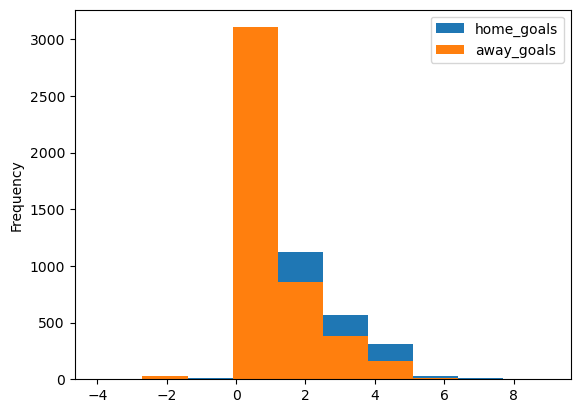

In [8]:
df[['home_goals', 'away_goals']].plot(kind='hist')

<Axes: >

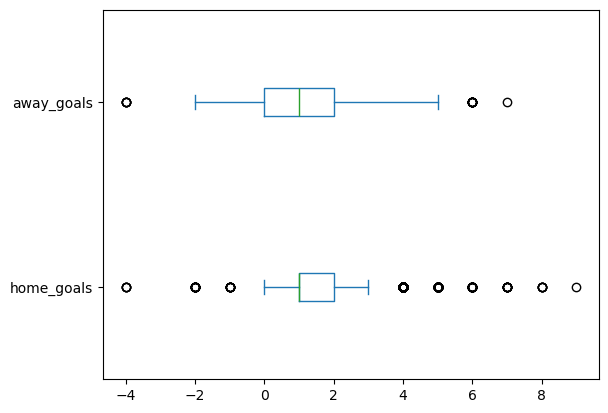

In [9]:
df[['home_goals', 'away_goals']].plot(kind='box', vert = False)

In [10]:
len(df[df['home_goals'] < 0])

34

In [11]:
len(df[df['away_goals'] < 0])

39

3. Replace invalid goals for 0

    Replace all the invalid goals in ``home_goals`` and ``away_goals`` with 0 (data imputation).

In [12]:
df.loc[df['home_goals'] < 0, 'home_goals'] = 0
df.loc[df['away_goals'] < 0, 'away_goals'] = 0

4. Identify and clean invalid results in the ``result`` column

    The ``result`` column contains a "summary" of the result of the match. ``H`` indicates a home win; ``A`` indicates an away win; ``D`` indicates a draw.

In [13]:
import numpy as np

conditions = [
    df['home_goals'] < df['away_goals'],
    df['away_goals'] < df['home_goals'],
    df['away_goals'] == df['home_goals'],
]

categories = ['A', 'H', 'D']

df['result'] = np.select(conditions, categories, default = 'Unknown')

In [14]:
df.loc[df['home_goals'] == df['away_goals'], 'result'] = 'D'
df.loc[df['home_goals'] > df['away_goals'], 'result'] = 'H'
df.loc[df['home_goals'] < df['away_goals'], 'result'] = 'A'

### Analysis

5. What's the average number of goals per match?

    Calculate the average number of goals per match. Enter the value with up to 2 decimals. Example, if you find the value to be ``1.8857``, enter just ``1.88``.

In [15]:
goals = df['home_goals'] + df['away_goals']
goals.mean()

2.6633771929824563

6. Create a new column ``total_goals``

    For the previous activity, it would have been convenient to have a ``total_goals`` column with the sum of ``home_goals`` and ``away_goals``.

In [16]:
df['total_goals'] = df['home_goals'] + df['away_goals']

7. Calculate average goals per season

    Calculate the number of average goals per season. The result should be a series ordered per season. Store the value in the variable ``goals_per_season``. It'll look something like:

In [17]:
goals_per_season = df.groupby('season')['total_goals'].mean()
goals_per_season

season
2006-2007         2.429799
2007-2008         2.618421
2008-2009         2.463158
2009-2010         2.747368
2010-2011         2.797368
2011-2012         2.763158
2012-2013         2.773684
2013-2014         2.718421
2014-2015         2.500000
2015-2016         2.676316
2016-2017         2.794737
2017-2018         2.678947
Unknown season    2.419355
Name: total_goals, dtype: float64

8. What's the biggest goal difference in a match?

    What was the biggest goal difference in a match found in the dataset?

    Note: Goal diff can be either from a home win, or an away win. Example: a ``10-1`` result or a ``1-10`` result are the same difference, 9 goals for the winning team.

In [18]:
diff = (df['home_goals'] - df['away_goals']).abs().max()
diff

8

9. What's the team with most away wins?

    Find the team that has won the most matches away from home.

In [19]:
df[df['result'] == 'A'].groupby('away_team').size().idxmax()

'Chelsea'

10. What's the team with the most goals scored at home?

In [20]:
df.groupby('home_team')['home_goals'].sum().idxmax()

'Manchester City'

11. What's the team that received the least amount of goals while playing at home?

    This is a tricky activity, because we're not looking for the "total" of goals received, but the "ratio" of received goals / played goals.

    Example, the team ``Charlton Athletic`` is the team with LITERALLY the least goals received at home, with only 20, but that's because they only played 38 matches in total, and only 19 at home.

    What's the team with the lowest goals received to match played ratio? Defined as: ``goals_received`` / ``home_games``.

In [21]:
team = df.groupby('home_team').agg({'home_team': 'count', 'away_goals': 'sum'})
team['ratio'] = team['away_goals'] / team['home_team']

In [22]:
team.sort_values('ratio')

,home_team,away_goals,ratio
home_team,,,
Manchester United,228,158,0.692982
Liverpool,228,180,0.789474
Arsenal,228,183,0.802632
Chelsea,228,183,0.802632
Manchester City,228,186,0.815789
Tottenham Hotspur,228,218,0.956140
Birmingham City,57,58,1.017544
Everton,228,238,1.043860
Charlton Athletic,19,20,1.052632


12. What's the team with most goals scored playing as a visitor (away from home)?

    What's the team that playing away from home scored the most goals?

In [36]:
df.groupby('away_team').agg({'away_goals': 'sum'}).sort_values('away_goals', ascending = False)[:1]


,away_goals
away_team,
Arsenal,379


## Analyzing newborn given names in Argentina

This project will help you practice your Data Wrangling and Data Analysis skills by inspecting the names of babies given to Argentina's newborns from 1922 to 2015.

For this project, you'll have to use some groupby() skills as well as filtering, sorting and visualizations.

The dataset was extracted from the official Argentina opendata [website](https://www.datos.gob.ar/dataset/otros-nombres-personas-fisicas)

Below are the columns of the dataset:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

The CSV we're using is rather large, so we have stored it compressed for this particular lab (using just ``zip``). The pd.read_csv method can automatically infer the compression method and read the data directly from a compressed file.

In [2]:
df = pd.read_csv('files/historic-names-argentina.zip')
df.head()

,name,quantity,year
0,Maria,314,1922
1,Rosa,203,1922
2,Jose,163,1922
3,Maria Luisa,127,1922
4,Carmen,117,1922


### Data Cleaning

1. How many rows contain null values in the ``name`` column?

    The first step is to identify null values in our dataframe. Let's start by ``name``. Count the number of null values in the name column and answer, how many ``np.nan`` values are there?

In [3]:
df.isna().sum()

name        13
quantity     0
year         0
dtype: int64

2. Drop any rows with null values, do it inplace

    Let's clean the dataframe now by removing any rows that have null values (in any columns). Perform the cleaning task in-place, that is, modifying the original ``df`` variable.

In [4]:
df.dropna(inplace=True)

### Data Analysis

3. What's the most popular name from 1953?

In [5]:
df.loc[df['year'] == 1953,['name', 'quantity']].sort_values(by = 'quantity', ascending = False)[:1]

,name,quantity
1670554,Juan Carlos,7357


4. What's the most popular name from 1992?

In [6]:
df.loc[df['year'] == 1992].sort_values(by = 'quantity', ascending = False)[:1]

,name,quantity,year
5930253,Maria Belen,6248,1992


5. What's the least popular name from 1978?

    If there are multiple names with the same quantity, enter the name with the highest index value.

In [7]:
df.loc[df['year'] == 1978].sort_values(by = 'quantity', ascending = True)[:]

,name,quantity,year
4135390,Valeria Karina Elizabeth,1,1978
4100155,Ester Maribel,1,1978
4100154,Zulema Vilma,1,1978
4100153,Argentina Guadalupe,1,1978
4100152,Giselle Ana Maria,1,1978
...,...,...,...
4014441,Carlos Alberto,3281,1978
4014440,Mario Alberto,3431,1978
4014439,Juan Carlos,3500,1978
4014438,Maria Laura,3753,1978


6. What's the least popular name from 2007?

    If there are multiple names with the same quantity, enter the name with the highest index value.

In [8]:
df.loc[(df['year'] == 2007) & (df['quantity'] == 1)].sort_index(ascending = False)[:1]#.idxmax()

,name,quantity,year
8443097,Walter Alxander,1,2007


7. How many people were born in the year 1950?

In [9]:
df.loc[(df['year'] == 1950), 'quantity'].sum()

505873

8. How many people were born in the year 1980?

In [10]:
df.loc[(df['year'] == 1980), 'quantity'].sum()

961605

9. What's the Growth Rate of newborns from 1930 to 1990?

    The growth rate measures the change from one period to another. In this case, we want to see the total change of quantity of babies between ``1930`` and ``1990``. Select the option that better matches the growth rate. Keep in mind that these are all approximate figures.

In [11]:
(df.loc[(df['year'] == 1990), 'quantity'].sum() - df.loc[(df['year'] == 1930), 'quantity'].sum()) / df.loc[(df['year'] == 1930), 'quantity'].sum()

9.071349113956797

10. What's the year with the most babies born?

In [12]:
df.groupby('year')['quantity'].sum().sort_values(ascending = False)[:1]

year
1993    1351207
Name: quantity, dtype: int64

11. What's the year with the least babies born?

In [13]:
df.groupby('year')['quantity'].sum().sort_values(ascending = True)[:1]

year
1922    23667
Name: quantity, dtype: int64

12. Plot the number of babies born per year

    Create a plot showing the total babies born per year. Use the ``fig`` and ``ax`` variables already defined, create your plot on the axis ``ax``. The plot must have the title ``"Number of babies born per year"`` and the y-axis should be formatted using ``,`` as thousands separators.

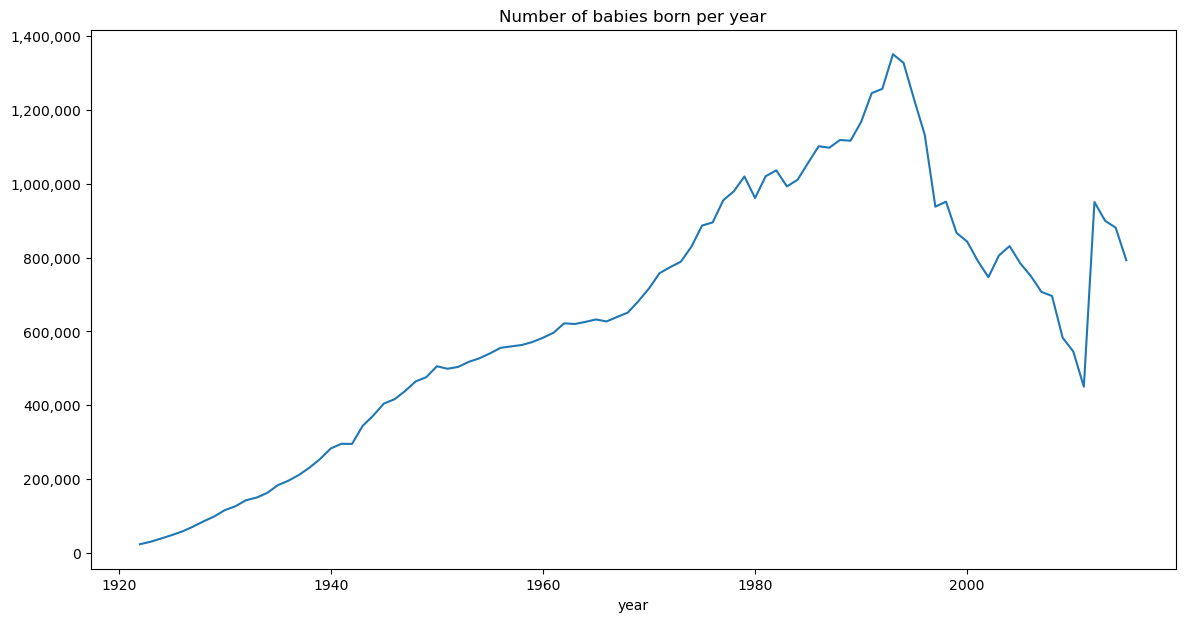

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))
from matplotlib.ticker import StrMethodFormatter
df_babies_per_year = df.groupby('year')['quantity'].sum()
df_babies_per_year.plot(title = 'Number of babies born per year', ax = ax)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

Otra solución

Text(0.5, 1.0, 'Number of babies born per year')

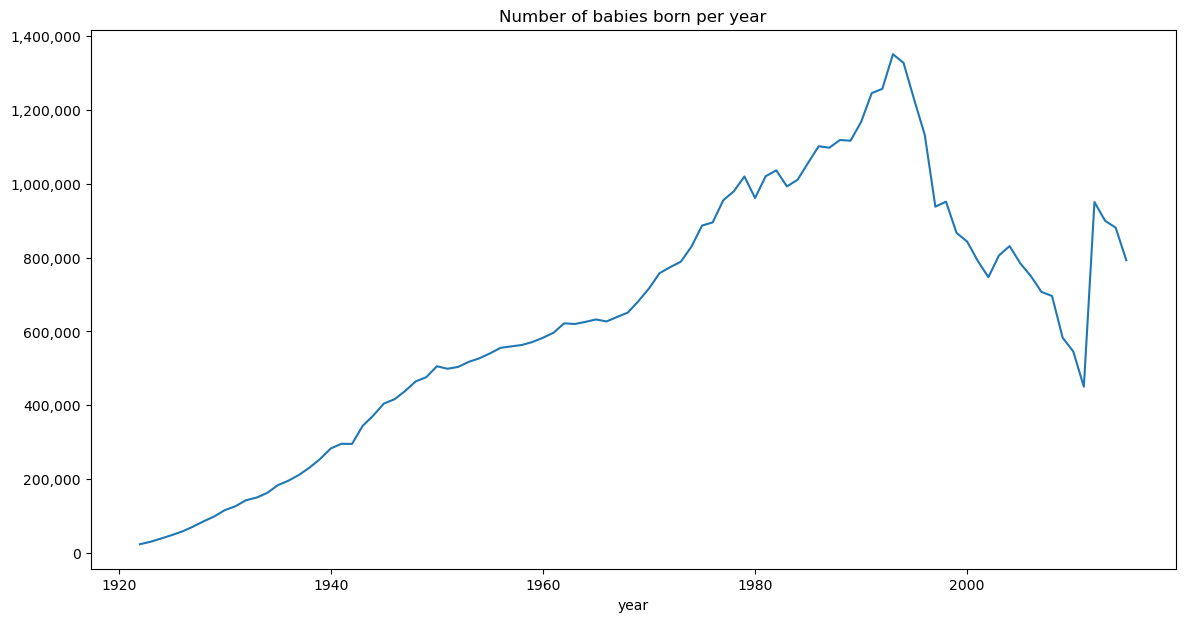

In [15]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(14, 7))
df.groupby('year')['quantity'].sum().plot(ax=ax)

formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Number of babies born per year')


13. Create a dataframe representing the 'uniqueness' of names

    We want to analyze how parents were with newborns across the years. To do so, we'll compare the number of unique names of each year to the total number of babies born. Uniqueness is defined then as: ``Total Unique Names / Total Newborns``. For example, given the following baby names in a year:

Esta solución es para nombres que solo tiene una persona

In [16]:
unique_names_df = df.groupby('year').agg(Total_Newborns = ('quantity', 'sum'), 
                                         Total_Unique_Names = ('quantity', lambda x: (x == 1).sum()),
                                         Uniqueness = ('quantity', lambda x:  (x == 1).sum()/ x.sum() ))
unique_names_df.columns = ['Total Newborns', 'Total Unique Names', 'Uniqueness']
unique_names_df

,Total Newborns,Total Unique Names,Uniqueness
year,,,
1922,23667,7153,0.302235
1923,30289,8755,0.289049
1924,39075,10818,0.276852
1925,48328,12443,0.257470
1926,58350,14460,0.247815
...,...,...,...
2011,450370,73767,0.163792
2012,950740,115649,0.121641
2013,900028,123311,0.137008


Esta solución es para todos los nombres del dataframe, pero solo se cuentan 1 sola vez

In [17]:
unique_names_df = df.groupby('year').agg(Total_Newborns = ('quantity', 'sum'), 
                                         Total_Unique_Names = ('name', 'size'))
unique_names_df.columns = ['Total Newborns', 'Total Unique Names']
unique_names_df['Uniqueness'] = unique_names_df['Total Unique Names'] / unique_names_df['Total Newborns']
unique_names_df

,Total Newborns,Total Unique Names,Uniqueness
year,,,
1922,23667,10333,0.436599
1923,30289,12777,0.421836
1924,39075,15981,0.408983
1925,48328,18796,0.388926
1926,58350,22172,0.379983
...,...,...,...
2011,450370,119431,0.265184
2012,950740,203486,0.214029
2013,900028,204470,0.227182


14. What's the year with the most 'variation' of names?

    Using the dataframe created before, which is the year with the most variations of names? Or, what's the same, the highest uniqueness score.

In [18]:
unique_names_df.sort_values('Uniqueness', ascending=False)[:1].index[0]

1922

15. When was the year with the least (lowest) 'variation' of names?

    Similar to the previous activity, now answer: which was the year with the least uniqueness?

In [19]:
unique_names_df.sort_values('Uniqueness', ascending=True)[:1].index[0]

1980

16. Create a visualization of the 'uniqueness' of names across the years

    Using the dataframe ``unique_names_df``, create a plot displaying the uniqueness of names across the years.

    The title of your chart should be ``"Baby name uniqueness across the years"`` and it should contain the legend ``"Uniqueness of names"`` for the single series plotted. It should look like this:

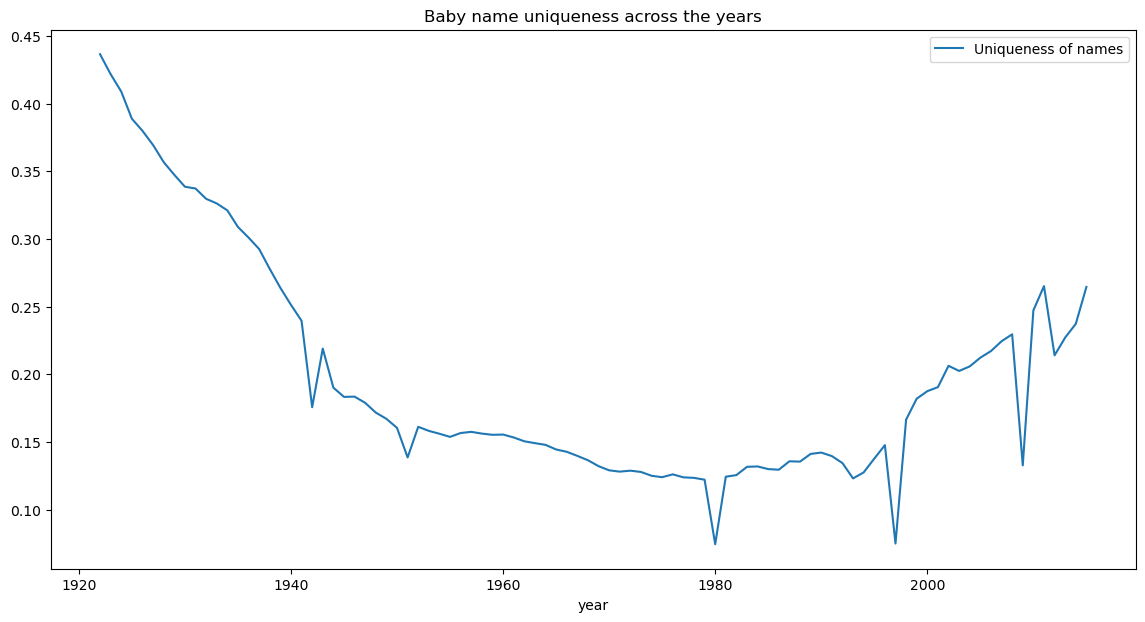

In [20]:
fig, ax = plt.subplots(figsize=(14, 7))
unique_names_df.plot(y = 'Uniqueness',
                     title = 'Baby name uniqueness across the years',
                     ax = ax)
ax.legend(['Uniqueness of names'])

17. How many babies were named 'carlos'?

    Juan Carlos, Jose Carlos, Giancarlos, or just plain Carlos...

    **Carlos** is a very popular name in spanish speaking countries

    So, answer the following: how many people were named "Carlos" throughout history?

    **Warning!** The following are all valid "Carlos", so be mindful about casing: ``Juan Carlos``, ``Carlos``, ``Giancarlos``.

In [21]:
df[df['name'].str.contains(pat = 'carlos', case = False)]['quantity'].sum()

1339111

18. What is the most popular 'Carlos' name?

    Is it ``Carlo Alberto``, ``Roberto Carlos``, or just plain ``Carlos``?

In [22]:
df[df['name'].str.contains(pat = 'carlos', case = False)].groupby('name')['quantity'].sum().sort_values( ascending = False)

name
Juan Carlos            288532
Carlos Alberto         190284
Carlos                  32446
Carlos Daniel           32261
Roberto Carlos          30241
                        ...  
Carlos Newen                1
Carlos Neure                1
Carlos Nestor Saul          1
Carlos Nestor Roque         1
Ángel Carlos                1
Name: quantity, Length: 30404, dtype: int64

19. The 'Diego' phenomenon

    "Diego Maradona" was a renowned Soccer/Football player from Argentina that played in the 80s/90s. He was an absolute sensation in Argentina. We want to know if he impacted new baby names.

    Create a Dataframe containing an aggregation of the total number of babies named "Diego" per year, in any variation: "Diego Martin", "Diego Alejandro", or just "Diego". In this case, we don't want to count any names that contain "diego" (in lowercase), just the names that contain the actual "Diego" name.

    Create the aggregation and store the result in the series ``diegos_per_year_s``. It should look something like:

In [23]:
diegos_per_year_s = df[df['name'].str.contains('Diego')].groupby('year')['quantity'].sum()
diegos_per_year_s

year
1922      22
1923      21
1924      21
1925      33
1926      41
        ... 
2011    1214
2012    2362
2013    2140
2014    2155
2015    1744
Name: quantity, Length: 94, dtype: int64

20. When was the year with most 'Diegos' born?

In [25]:
diegos_per_year_s.idxmax()

1979

21. Create a visualization of 'Diegos' born between 1960 and 2015

    Create a plot showing the number of "Diegos" born between 1960 and 2015, including both limits (``[1960, 2015]``). The plot should have the title ``Total 'Diegos' born per year [1960-2015]``, and it should look something like:

<Axes: title={'center': "Total 'Diegos' born per year [1960-2015]"}, xlabel='year'>

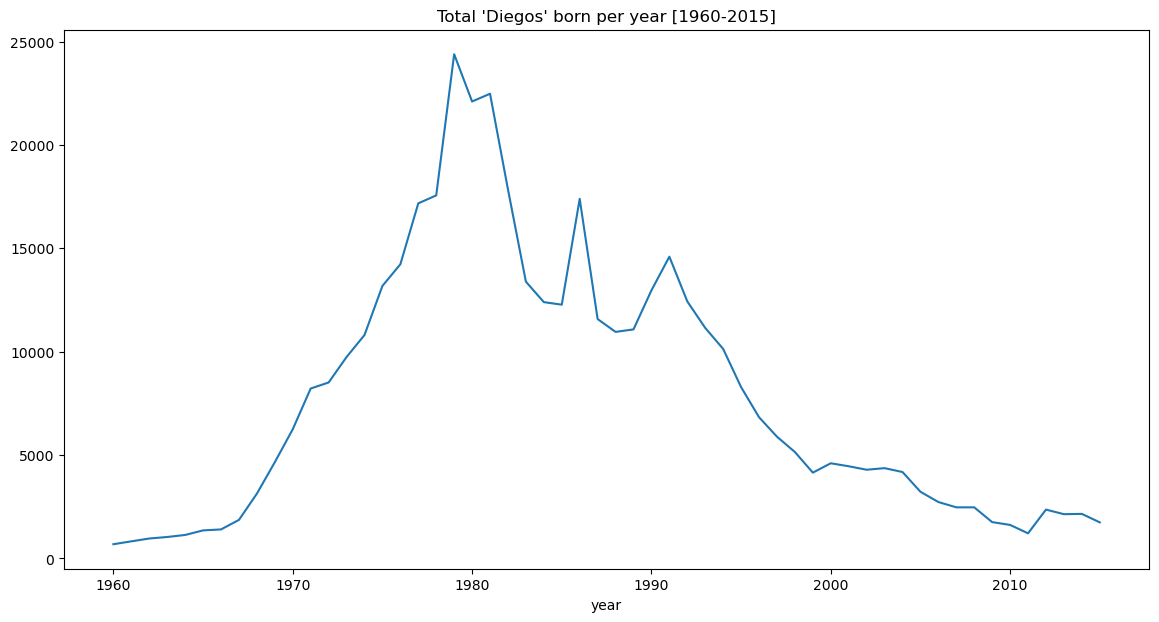

In [32]:
fig, ax = plt.subplots(figsize=(14, 7))
diegos_per_year_s[(diegos_per_year_s.index >= 1960) & (diegos_per_year_s.index <= 2015)].plot(title = "Total 'Diegos' born per year [1960-2015]", ax = ax)

22. Extract the most popular names per year

    Create a DataFrame containing information of the most popular name for each year (that with the highest quantity). Store it in the variable ``most_popular_per_year_df``. It should be sorted by year in ascending order.

    **Important!** The index of the dataframe is important and must be respected based on the most popular name of each year. It should look like this:

In [55]:
max_index  = df.groupby(['year'])['quantity'].agg('idxmax')
max_index

most_popular_per_year_df = df.loc[max_index][['year', 'name', 'quantity']]
most_popular_per_year_df

,year,name,quantity
0,1922,Maria,314
10333,1923,Maria,351
23110,1924,Maria,416
39091,1925,Maria,496
57887,1926,Maria,575
...,...,...,...
8815259,2011,Benjamin,2535
8934690,2012,Benjamin,4724
9138176,2013,Benjamin,4960
9342646,2014,Benjamin,4286


23. Which was the most popular name among the most popular names?

In [62]:
df.groupby('name')['quantity'].sum().sort_values(ascending = False)[:10]

name
Juan Carlos       288532
Miguel Angel      252514
Carlos Alberto    190284
Jose Luis         168774
Ana Maria         150638
Maria Cristina    124121
Luis Alberto      123746
Juan Manuel       111369
Juan Pablo         93762
Juan Jose          86081
Name: quantity, dtype: int64

In [61]:
most_popular_per_year_df['name'].value_counts()

name
Juan Carlos        38
Maria              11
Valentina           8
Maria Belen         8
Benjamin            7
Miguel Angel        6
Maria Laura         4
María Belén         2
VALENTINA           2
María Laura         1
Juan Pablo          1
Leonel Hernan       1
Maria Belén         1
Maria Florencia     1
Agustin             1
Norma Beatriz       1
Juan Manuel         1
Name: count, dtype: int64

# Transforming data: Discretization, Binning and Dummies

## Practicing Discretization and Binning with Music data

### Introduction

In this lab on Transforming Data: Discretization, Binning, and Dummies, we will explore a variety of activities to gain insights and analyze the Spotify and YouTube dataset using Pandas techniques. Let's take a closer look at the activities we will cover:

- **Discretization and Binning**: We will use the ``pd.cut`` and ``pd.qcut`` functions to categorize continuous variables into bins or quantiles. By grouping the data into predefined ranges, we can analyze the distribution of tracks across different levels or categories, and investigate potential correlations with other variables.

- **Creating Binary Indicators**: We will utilize the ``pd.get_dummies`` function to create binary indicators for different types present in each categorical column. This technique is particularly useful when we want to represent categorical data in a format suitable for analysis or modeling.

### The Dataset used

For this lab, we will be working with a dataset that combines data from Spotify and YouTube. The dataset includes features such as track information, album details, audio attributes, YouTube video details, and engagement metrics. This rich dataset allows us to explore relationships between audio features, popularity, and YouTube performance.

### Analysis and activities

Through these activities, you will gain hands-on experience in transforming and analyzing data using Pandas. You will learn how to discretize continuous variables, create binary indicators for categorical variables, and explore the relationships between different attributes in the Spotify and YouTube dataset.

Are you ready to dive into the lab and discover intriguing patterns and insights hidden within the Spotify and YouTube data? Let's get started!

In [2]:
import pandas as pd # to read the dataframe
import matplotlib.pyplot as plt # to plot the data
import numpy as np

In [3]:
# Reading dataframes
tracks_df = pd.read_csv('files/Spotify_Youtube.csv')

In [4]:
tracks_df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
#show the number of cells in the dataframe
print("tracks dataframe size: ", tracks_df.size)

#show the number of records (rows) in the dataframe
print("number of tracks: ", len(tracks_df))

tracks dataframe size:  559386
number of tracks:  20718


In [6]:
tracks_df.dtypes

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [7]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

In [8]:
tracks_df.isna().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

### Data Cleaning

1. Replace Missing Values in Columns ``'Views'``, ``'Likes'``, and ``'Comments'`` with Their Respective Medians

    Modify the ``tracks_df`` DataFrame directly to replace missing values.

In [9]:
tracks_df.fillna({'Views':tracks_df['Views'].median(), 'Likes':tracks_df['Likes'].median(), 'Comments':tracks_df['Comments'].median()}, inplace = True)

2. Replace Missing Values in Specified Columns with Their Respective Means

    Modify the ``tracks_df`` Dataframe by replacing the missing values in the ``Duration_ms``, ``Loudness``, ``Speechiness``, ``Energy``, and ``Tempo`` columns with their respective means.

In [10]:
tracks_df.fillna({'Duration_ms':tracks_df['Duration_ms'].mean(),
                  'Loudness':tracks_df['Loudness'].mean(),
                  'Speechiness':tracks_df['Speechiness'].mean(),
                  'Energy':tracks_df['Energy'].mean(),
                  'Tempo':tracks_df['Tempo'].mean()},
                   inplace = True)

3. Classify track durations into ``Short``, ``Medium`` and ``long``.

    Using the ``Duration_ms`` column, we want to discretize the durations of our tracks into three categories:

    - ``Short`` tracks: those that are between ``0`` and ``180000`` ms.
    - ``Medium`` tracks: between ``180000`` and ``300000`` ms
    - ``Long`` : above ``300000`` ms

    Create the categories and store them in a new column ``Duration_Category``

In [11]:
tracks_df['Duration_Category'] = pd.cut(tracks_df['Duration_ms'], bins = [0, 180000, 300000, np.inf], labels = ['Short','Medium','Long'])

4. Categorize Track Tempo into Appropriate Bins

    Using the ``Tempo`` column, we want to discretize the tempo of our tracks into three categories:

    - ``Slow`` tracks: those that are between 0 and ``100`` bpm.
    - ``Medium`` tracks: between ``100`` and ``140`` bpm
    - ``Fast``: above ``140`` bpm
    
    Create the categories and store them in a new column ``Tempo_Category``. It should look similar to:

In [12]:
tracks_df['Tempo_Category'] = pd.cut(tracks_df['Tempo'], bins = [0, 100, 140, float('inf')], labels = ['Slow', 'Medium', 'Fast'])

5. Categorize Tracks as 'Viral' or 'Non-Viral' Based on Views

    Using the ``Views`` column, we want to discretize the views of our tracks into two categories:

    - ``Non-Viral`` tracks: those that are between ``0`` and ``1,000,000`` views.
    - ``Viral`` tracks: above ``1,000,000`` views

In [13]:
tracks_df['Viral_Category'] = pd.cut(tracks_df['Views'], bins = [-float('inf'), 1_000_000, float('inf')], labels = ['Non-Viral', 'Viral'])

6. Create a Grouped Bar Chart to Visualize the Relationship Between ``Viral_Category`` and ``Tempo_Category``

    Store the generated chart in a variable named ``viral_tempo_bar_chart`` and the organized data in another variable named ``viral_tempo_counts``.

    Notes:

    - Please complete the previous activities before attempting this one.

    - Your chart should be a stacked bar chart and have a figure size of ``(10, 6)``.

In [14]:
viral_tempo_counts = tracks_df.groupby(['Viral_Category', 'Tempo_Category'])['Tempo_Category'].count().unstack()
viral_tempo_counts

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_4600\2424119266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  viral_tempo_counts = tracks_df.groupby(['Viral_Category', 'Tempo_Category'])['Tempo_Category'].count().unstack()


Tempo_Category,Slow,Medium,Fast
Viral_Category,,,
Non-Viral,1302,1853,912
Viral,4657,7850,4127


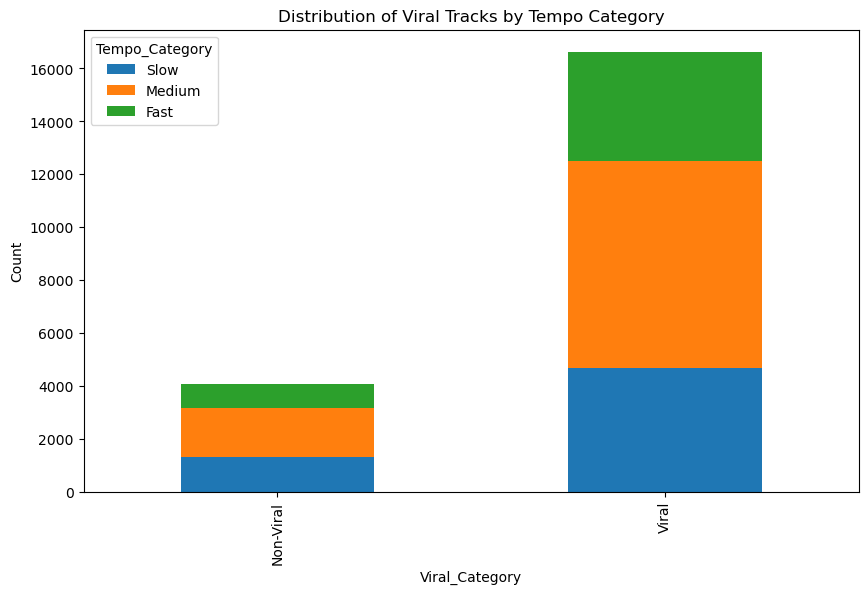

In [15]:
viral_tempo_bar_chart = viral_tempo_counts.plot(kind = 'bar',
                                                stacked=True,
                                                title = 'Distribution of Viral Tracks by Tempo Category',
                                                ylabel = 'Count',
                                                figsize=(10,6)
                                                )


7. Create a Grouped Bar Chart Visualizing ``Viral_Category`` & ``Duration_Category`` Relation

    Store the resulting chart in the variable ``duration_viral_bar_chart`` and the grouped data in the variable ``duration_viral_counts``.

    Notes:

    - Ensure completion of previous activities before attempting this one.

    - Construct a stacked bar chart with a figure size of ``(10, 6)``.

In [16]:
duration_viral_counts = tracks_df.groupby(['Viral_Category', 'Duration_Category'])['Duration_Category'].count().unstack()
duration_viral_counts

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_4600\2637250598.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_viral_counts = tracks_df.groupby(['Viral_Category', 'Duration_Category'])['Duration_Category'].count().unstack()


Duration_Category,Short,Medium,Long
Viral_Category,,,
Non-Viral,1471,2216,393
Viral,3703,11259,1676


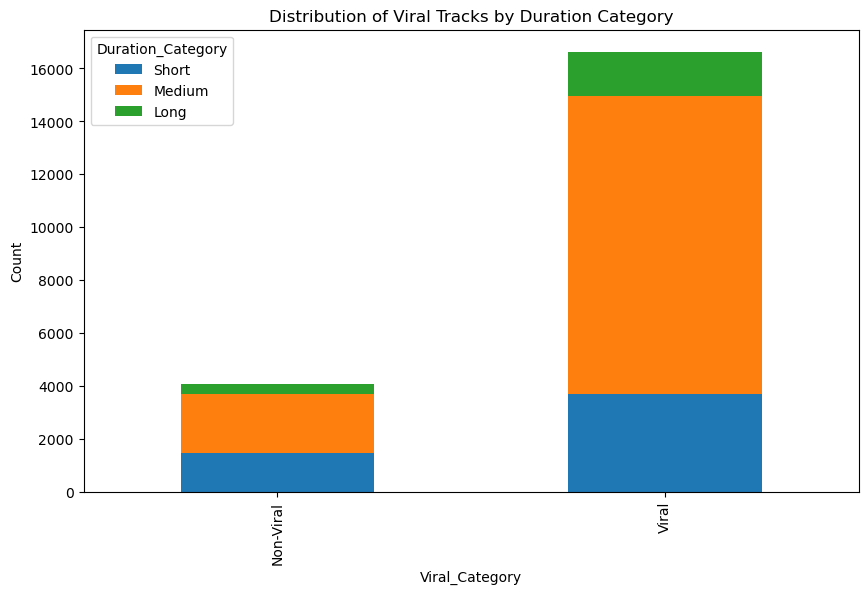

In [17]:
duration_viral_bar_chart = duration_viral_counts.plot(kind = 'bar',
                                                      stacked = True,
                                                      ylabel = 'Count',
                                                      title = 'Distribution of Viral Tracks by Duration Category',
                                                      figsize=(10,6))

8. Generate Dummy Variables for the ``Album_type`` Column with ``Track`` Prefix

    Store the resulting dummy variables in the ``album_type_dummies`` variable. Be sure to prefix each variable with ``Track``. Don't forget to convert the dtype of each column in the dummy variables to ``bool``.

In [18]:
album_type_dummies = pd.get_dummies(data = tracks_df['Album_type'], prefix='Track').astype(bool)
album_type_dummies 

,Track_album,Track_compilation,Track_single
0,True,False,False
1,True,False,False
2,False,False,True
3,True,False,False
4,True,False,False
...,...,...,...
20713,False,False,True
20714,False,False,True
20715,False,False,True
20716,False,False,True


9. Categorize 'Loudness' Column into Predefined Bins

    Using the ``Loudness`` column, we want to discretize the loudness of our tracks into five categories:

    - ``Very Low`` tracks: those that are between -50 and -35 dB.
    - ``Low`` tracks: between -35 and -20 dB
    - ``Moderate`` tracks: between -20 and -5 dB
    - ``High`` tracks: between -5 and 10 dB
    - ``Very High``: above 10 dB
    Create the categories and store them in a new column ``Loudness_Category``. It should look similar to:

In [19]:
tracks_df['Loudness_Category'] = pd.cut(tracks_df['Loudness'], 
                                        bins = [-50, -35, -20, -5, 10, float('inf')], labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

10. Calculate the Number of Tracks with a ``'Loudness_Category'`` of ``'High'``.

In [26]:
tracks_df['Loudness_Category'].value_counts()

Loudness_Category
Moderate     14738
High          5410
Low            510
Very Low        60
Very High        0
Name: count, dtype: int64

11. Generate Dummy Variables for ``'Artist'`` Column with ``'Genre'`` Prefix

    Generate dummy variables for the ``'Artist'`` column. Each of these variables must be prefixed with ``'Genre'``, using a colon ``':'`` as the separator. Ensure the resultant data is stored in a new variable named ``genres_dummies``. Remember to convert the dtype of each column in the dummy variables to ``bool``.

In [29]:
genres_dummies = pd.get_dummies(tracks_df['Artist'], prefix= 'Genre', prefix_sep= ':', dtype= bool)
genres_dummies

,Genre:$NOT,Genre:$uicideboy$,Genre:(G)I-DLE,Genre:*NSYNC,Genre:070 Shake,Genre:112,Genre:11:11 Music Group,Genre:1nonly,Genre:2 Chainz,Genre:21 Savage,...,Genre:mor ve ötesi,Genre:sped up nightcore,Genre:surrenderdorothy,Genre:t.A.T.u.,Genre:thasup,Genre:will.i.am,Genre:Ángela Aguilar,Genre:Ñejo,Genre:Ñengo Flow,Genre:Øneheart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


12. Categorize Tracks into Five Quantiles Based on Speechiness

    Store the categorized results into a new column titled Speechiness_Quantile. The quantiles should be labeled ``Q1``, ``Q2``, ``Q3``, ``Q4``, ``Q5``.

In [35]:
tracks_df['Speechiness_Quantile'] = pd.qcut(tracks_df['Speechiness'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])

13. Categorize the ``'Energy'`` Column into Given Bins and Ranges

    Using the Energy column, we want to discretize the energy of our tracks into five categories:

    - ``Very Low`` tracks: those that are between 0 and 0.2.
    - ``Low`` tracks: between 0.2 and 0.4
    - ``Moderate`` tracks: between 0.4 and 0.6
    - ``High`` tracks: between 0.6 and 0.8
    - ``Very High``: above 0.8

Create the categories and store them in a new column ``Energy_Category``. It should look similar to:

In [37]:
tracks_df['Energy_Category'] = pd.cut(tracks_df['Energy'], bins = [0, 0.2, 0.4, 0.6, 0.8, float('inf')], labels= ['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

## Discretization and Binning with Fitness data

In this lab, we will explore a variety of activities using the "Exercise and Fitness Metrics" dataset, employing powerful Pandas techniques. Let's dive into the intriguing activities we will cover:

- **Discretization and Binning**: Utilizing ``pd.cut`` and ``pd.qcut``, we will categorize continuous variables into bins or quantiles. By grouping the data into predefined ranges, we can analyze the distribution of exercise-related metrics and investigate potential correlations with other variables.

- **Creating Binary Indicators**: Leveraging ``pd.get_dummies``, we will generate binary indicators for different types present in each categorical column. This technique is particularly useful when we want to represent categorical data in a format suitable for analysis or modeling.

### The Dataset used

The **Exercise and Fitness Metrics** dataset comprises exercise-related information such as exercise type, calories burned, dream weight, actual weight, age, gender, duration, heart rate, BMI, weather conditions, exercise intensity, age group, weight category, exercise level, exercise intensity category, calorie burn category, BMI category, and heart rate zone.

### Analysis and activities

Through the activities in this lab, you will gain hands-on experience in transforming and analyzing data using Pandas. You will learn how to discretize continuous variables, create binary indicators for categorical variables, and explore relationships between different attributes in the Exercise and Fitness Metrics dataset.

Are you ready to dive into the lab and discover intriguing patterns and insights hidden within the **Exercise and Fitness Metrics** data? Let's get started!

In [1]:
# to read the dataframe
import pandas as pd
# For mathematical calculations
import numpy as np

In [5]:
# Reading dataframes
exercises_df = pd.read_csv('files/exercise_dataset.csv')

In [6]:
exercises_df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [7]:
exercises_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


### Activities

1. Classify age into categories

    To analyze exercise habits across different age groups, we need to categorize the ``Age`` column into meaningful groups. Create three age categories:

    - Young: ``0-30``
    - Adult: ``30-60``
    - Senior: above ``60``
    
    Store the result in a new column called ``AgeGroup``. The output should resemble the provided example series.

In [8]:
exercises_df['AgeGroup'] = pd.cut(exercises_df['Age'], bins=[0, 30, 60, float('inf')], labels=['Young', 'Adult', 'Senior'])

2. Categorize Actual Weight into Weight Categories

    To analyze exercise habits across different weight ranges, we need to categorize the Actual Weight into meaningful groups. Create three weight categories:

    - Lightweight: ``0-60``
    - Normal Weight:`` 60-80``
    - Overweight: ``above 80``
    
    Store the result in a new column called ``WeightCategory``. The output should resemble the provided example series. 

In [9]:
exercises_df['WeightCategory'] = pd.cut(exercises_df['Actual Weight'], bins= [0, 60, 80, float('inf')], labels=['Lightweight', 'Normal Weight', 'Overweight'])

3. Categorize Exercise Durations into Meaningful Groups

    In this activity, we want to categorize exercise durations into three meaningful groups: Sedentary, Moderate, and Active. By doing this, we can analyze exercise habits across different duration ranges such as 0, 25, 50, and inf.

    Here are the steps to complete the task:

    1. Create a new column named ``ExerciseLevel``.
    2. Categorize each exercise duration according to the following ranges:

        -   Sedentary: duration less than 25 minutes.
        -   Moderate: duration between 25 and 50 minutes (inclusive).
        -   Active: duration greater than 50 minutes.
        -   Store the categorization result in the ``ExerciseLevel`` column.

    The output should resemble the provided example series.

In [10]:
exercises_df['ExerciseLevel'] = pd.cut(exercises_df['Duration'], bins= [0, 25, 50, float('inf')], labels=['Sedentary', 'Moderate', 'Active'])

4. Generate Gender dummy variables with a colon separator

    Generate dummy variables for the ``Gender`` column and store the result in the variable ``gender_dummies``. Each variable should be prefixed with ``Gender`` using a colon ``:`` separator.

In [12]:
gender_dummies = pd.get_dummies(exercises_df['Gender'], prefix='Gender', prefix_sep=':', dtype=bool)
gender_dummies

,Gender:Female,Gender:Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
3859,True,False
3860,True,False
3861,False,True
3862,True,False


5. Create Dummy Variables for Weather Conditions Column and Drop First Categorical Level

    Create dummy variables for the ``"Weather Conditions"`` column. Each variable should be prefixed with ``"Weather:"`` and separated by a colon ``":"``. Make sure to drop the first categorical level, but keep it as a level if the row has 0 in all categorical levels.

    Store the resulting dummy variables in the variable ``Weather_dummies``.

In [20]:
Weather_dummies = pd.get_dummies(exercises_df['Weather Conditions'], prefix='Weather', prefix_sep=':', dtype=bool)
Weather_dummies.drop(Weather_dummies.columns[0], axis=1, inplace=True)
Weather_dummies

,Weather:Rainy,Weather:Sunny
0,True,False
1,True,False
2,False,False
3,False,True
4,False,False
...,...,...
3859,False,False
3860,True,False
3861,True,False
3862,True,False


6. Categorize Exercises by Intensity Level

    Create a new column called ExerciseIntensityCategory to categorize the exercises into four intensity levels:

    - "Low Intensity" (``0-0.25``),
    - "Medium Intensity" (``0.25-0.50``),
    - "Above-Medium Intensity" (``0.50-0.75``),
    - "High Intensity" (``0.75-1``)
    
    Based on their exercise intensity values. Assign each exercise to an appropriate intensity level using the quantiles ``0``, ``0.25``, ``0.5``, ``0.75``, and ``1``.

In [22]:
exercises_df['ExerciseIntensityCategory'] = pd.qcut(exercises_df['Exercise Intensity'], 4, labels=['Low Intensity','Medium Intensity','Above-Medium Intensity','High Intensity'])

7. Categorize Exercises by Calorie Burn Level

    Create a new column called ``CalorieBurnCategory`` and assign each exercise to one of three categories based on the ``CaloriesBurn`` column:

    - Low Calorie Burn: exercises with a low calorie burn rate
    - Moderate Calorie Burn: exercises with a moderate calorie burn rate
    - High Calorie Burn: exercises with a high calorie burn rate
    
    You should use 3 quantiles to determine the category boundaries. Store the category labels in the ``calorie_burn_bin_edges`` variable.

In [33]:
exercises_df['CalorieBurnCategory'], calorie_burn_bin_edges = pd.qcut(exercises_df['Calories Burn'], 3, labels=['Low Calorie Burn','Moderate Calorie Burn','High Calorie Burn'], retbins= True)

8. Categorize exercises into BMI categories with 3 quantiles

    Create a new column called ``BMICategory`` to categorize exercises as ``Underweight``, ``Normal Weight``, or ``Overweight`` based on their ``BMI``. Use 3 quantiles to define the categories. Store the bin edges in the variable ``bmi_bin_edges``.

In [27]:
exercises_df['BMICategory'], bmi_bin_edges = pd.qcut(exercises_df['BMI'], 3, labels= ['Underweight', 'Normal Weight', 'Overweight'], retbins = True)

9. Categorize Exercises by HeartRateZone

    Create a new column called ``HeartRateZone`` and categorize the exercises based on their ``Heart rate`` into the ``Resting Zone``,``Fat-Burning Zone``, or ``Cardio Zone``. Use three quantiles to define the categories. Store the bin edges in the variable ``heart_rate_bin_edges``

In [28]:
exercises_df['HeartRateZone'], heart_rate_bin_edges = pd.qcut(exercises_df['Heart Rate'], 3, labels = ['Resting Zone', 'Fat-Burning Zone', 'Cardio Zone'], retbins = True)

10. Analyze the relationship between BMI and exercise intensity or fitness metrics and calculate average ``Exercise Intensity`` for each ``BMICategory``

    Calculate the average ``Exercise Intensity`` for each ``BMICategory`` and store the result in the variable ``bmi_exercise_frequency``. This analysis will help us understand the relationship between BMI and exercise intensity or fitness metrics.

In [30]:
bmi_exercise_frequency = exercises_df.groupby('BMICategory')['Exercise Intensity'].mean()
bmi_exercise_frequency

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_2192\3968176474.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_exercise_frequency = exercises_df.groupby('BMICategory')['Exercise Intensity'].mean()


BMICategory
Underweight      5.471273
Normal Weight    5.552795
Overweight       5.347826
Name: Exercise Intensity, dtype: float64

11. Create a grouped bar chart to visualize the relation between ``CalorieBurnCategory`` & ``Exercise``

    Store the resulting chart in the variable ``calories_exercises_count_chart`` & the grouped data in the variable ``exercises_count_data``.

    Notes:

    - Make sure to pass activity 7 first before you try this activity.
    - It should be a stacked bar chart with figure size of ``(10, 6)``.

In [37]:
exercises_count_data = exercises_df.groupby('CalorieBurnCategory')['Exercise'].value_counts().unstack()
exercises_count_data

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_2192\2287877880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exercises_count_data = exercises_df.groupby('CalorieBurnCategory')['Exercise'].value_counts().unstack()


Exercise,Exercise 1,Exercise 10,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9
CalorieBurnCategory,,,,,,,,,,
Low Calorie Burn,143,143,107,143,106,131,127,127,134,127
Moderate Calorie Burn,139,128,144,118,131,126,126,112,143,121
High Calorie Burn,121,127,94,124,134,147,128,147,120,146


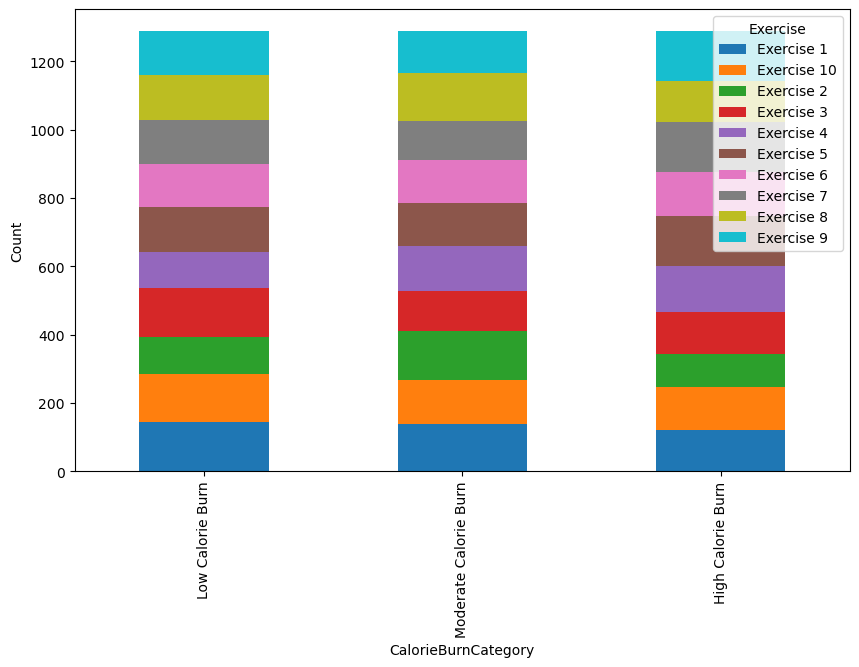

In [38]:
calories_exercises_count_char = exercises_count_data.plot(kind ='bar', stacked = True, ylabel = 'Count' ,figsize = (10, 6))

## From Continuous to Categorical: Data Wrangling with Dairy Sales data

### Introduction

Welcome to the third lab on Transforming Data: Discretization, Binning, and Dummies! Get ready to explore the fascinating world of data transformation using the intriguing "Dairy Goods Sales" dataset.

In this lab, we will harness the power of Pandas to perform various activities that will give you a hands-on experience in transforming and analyzing data. We will delve into discrete categorization using ``pd.cut`` and ``pd.qcut``, create binary indicators with ``pd.get_dummies``, and unravel the relationships between different attributes.

#### The Dataset used

The **Dairy Goods Sales** dataset provides valuable insights into the sales of dairy products, including information on location, total land area, number of cows, farm size, dates, product details, quantities, prices, revenue, shelf life, storage conditions, customer locations, sales channels, stock quantities, minimum stock thresholds, and reorder quantities.

#### Analysis and activities

Through the activities in this lab, you will gain practical insights into transforming and analyzing data using Pandas. You will learn how to discretize continuous variables, create binary indicators for categorical variables, and explore relationships between different attributes in the "Dairy Goods Sales" dataset.

Are you excited to dive into this transformative journey and unravel the hidden patterns and insights within the **Dairy Goods Sales** data? Let's get started and uncover the secrets that lie within!

In [1]:
# to read the dataframe
import pandas as pd

In [2]:
# Reading dataframes
goods_df = pd.read_csv('files/dairy_dataset.csv')

In [3]:
goods_df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [4]:
#show the number of cells in the dataframe
print("goods dataframe size: ", goods_df.size)

#show the number of records (rows) in the dataframe
print("number of goods: ", len(goods_df))

goods dataframe size:  99475
number of goods:  4325


In [5]:
goods_df.dtypes

Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product ID                               int64
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

In [6]:
goods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

### Activities

1. Categorize Land Area into Small, Medium, Large, and Extra Large Categories

    To explore the relationship between land size and total sales, we want to categorize the land area using the Total Land Area (acres) column into meaningful categories: ``Small``, ``Medium``, ``Large``, and ``Extra Large``. We will use the following ranges to define each category: ``0``, ``50``, ``100``, ``200``, and ``inf``.

    Create a new column named ``LandAreaCategory`` and store the result in this column. The categories should be as follows:

    - ``Small``: land areas between 0 and 50 acres.
    - ``Medium``: land areas between 50 and 100 acres.
    - ``Large``: land areas between 100 and 200 acres.
    - ``Extra Large``: land areas above 200 acres.

In [8]:
goods_df['LandAreaCategory'] = pd.cut(goods_df['Total Land Area (acres)'], bins=[0, 50, 100, 200, float('inf')], labels=['Small', 'Medium', 'Large', 'Extra Large'])

2. Categorize Product Prices into Different Price Categories

    In order to analyze the distribution of sales across different price levels, we need to categorize the prices of our products. We will use the ``Price per Unit`` column to do this.

    Below are the price categories and their corresponding price ranges:

    - ``Low``: prices between 0 and 10
    - ``Medium``: prices between 10 and 20
    - ``High``: prices between 20 and 30
    - ``Premium``: prices above 30
    
    Create a new column called ``PriceCategory`` to store

In [9]:
goods_df['PriceCategory'] = pd.cut(goods_df['Price per Unit'], bins=[0, 10, 20, 30, float('inf')], labels=['Low','Medium','High','Premium'])

3. Creating Dummy Variables for Dairy Brands

    To examine the impact of different dairy brands on sales performance, we will create dummy variables for each brand using the ``Brand`` column. The dummy variables should have the prefix ``Brand`` and use the default separator.

    Store the resulting dummy variables in the variable ``brand_dummies``.

In [11]:
brand_dummies = pd.get_dummies(goods_df['Brand'], prefix= 'Brand')
brand_dummies

,Brand_Amul,Brand_Britannia Industries,Brand_Dodla Dairy,Brand_Dynamix Dairies,Brand_Mother Dairy,Brand_Palle2patnam,Brand_Parag Milk Foods,Brand_Passion Cheese,Brand_Raj,Brand_Sudha,Brand_Warana
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4320,False,False,False,False,True,False,False,False,False,False,False
4321,False,False,False,False,False,True,False,False,False,False,False
4322,False,False,False,False,True,False,False,False,False,False,False
4323,False,False,False,False,False,False,False,False,True,False,False


4. Investigating the Effect of Product Shelf Life on Customer Demand

    We want to analyze the impact of product shelf life on customer demand by discretizing the ``Shelf Life (days)`` column into different categories. To do this, create a new column called ``ShelfLifeCategory`` to store the results. The categories should be as follows:

    - ``Short``: shelf life between 0 and 7 days
    - ``Medium``: shelf life between 7 and 14 days
    - ``Long``: shelf life between 14 and 30 days
    - ``Very Long``: shelf life above 30 days

In [13]:
goods_df['ShelfLifeCategory'] = pd.cut(goods_df['Shelf Life (days)'], bins = [0, 7, 14, 30, float('inf')], labels=['Short','Medium','Long','Very Long'])

5. Categorizing Storage Conditions Using Dummy Variables for Sales Analysis

    Create dummy variables for the ``Storage Condition`` column, which contains different conditions such as refrigerated and ambient. This will allow us to examine the effects of storage conditions on sales. Use the prefix "Storage" and the default separator when creating the dummy variables. Save the resulting dataframe in a variable named ``storage_dummies``.

In [15]:
storage_dummies = pd.get_dummies(goods_df['Storage Condition'], prefix= 'Storage')
storage_dummies

,Storage_Ambient,Storage_Frozen,Storage_Polythene Packet,Storage_Refrigerated,Storage_Tetra Pack
0,False,True,False,False,False
1,False,False,False,False,True
2,False,False,False,True,False
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
4320,False,False,False,True,False
4321,False,False,False,True,False
4322,False,False,False,True,False
4323,False,False,False,True,False


6. Create Binary Indicators for Different Sales Channels to Identify Effective Channels for Dairy Sales

Create binary indicators for different sales channels, such as online and offline, to identify the most effective channels for dairy sales. Use the prefix ``Channel``,``:`` as a separator for each indicator. Save the results in a variable called ``channel_dummies``.

In [17]:
channel_dummies = pd.get_dummies(goods_df['Sales Channel'], prefix= 'Channel', prefix_sep=':')
channel_dummies

,Channel:Online,Channel:Retail,Channel:Wholesale
0,False,False,True
1,False,False,True
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
4320,True,False,False
4321,False,True,False
4322,False,True,False
4323,False,False,True


7. Discretize Production Dates into Monthly Time Periods for Analyzing Seasonal Sales Trends

    In order to analyze the seasonal sales trends, we need to categorize the production dates into specific time periods (months) and create a new column called ``ProductionMonth``.

    The production dates will be divided into different time periods based on month ranges throughout the dataset, leaving the first interval inclusive. Each time period will be labeled with a number from 1 to the length of the month bins.

    Once the categorization is completed, the results should be stored in the ``ProductionMonth`` column. The final outcome should resemble the series shown in the provided image.

In [31]:
goods_df['Production Date'] = pd.to_datetime(goods_df['Production Date'])

bins = pd.date_range(start = goods_df['Production Date'].min(), 
                     end = goods_df['Production Date'].max(), 
                     freq = 'M')

goods_df['ProductionMonth'] = pd.cut(goods_df['Production Date'], bins= bins, labels= range(1, len(bins)), include_lowest= True)

goods_df['ProductionMonth']

0       37
1       35
2       38
3        6
4       23
        ..
4320    39
4321    40
4322    14
4323    47
4324     2
Name: ProductionMonth, Length: 4325, dtype: category
Categories (48, int64): [1 < 2 < 3 < 4 ... 45 < 46 < 47 < 48]

8. Categorize Stock Levels into Low, Medium, and High Categories

    To assess the adequacy of stock levels and determine optimal replenishment strategies, we need to analyze the Quantity in Stock (liters/kg) column. We will categorize the stock levels into three meaningful categories:

    - ``Low`` - for stock levels below the first quantile
    - ``Medium`` - for stock levels between the first and second quantiles
    - ``High`` - for stock levels above the second quantile
    
    Create a new column named ``StockCategory`` to store the results. Additionally, store the bins in a variable ``stock_bins``.

In [33]:
goods_df['StockCategory'], stock_bins = pd.qcut(goods_df['Quantity in Stock (liters/kg)'], 3, labels= ['Low', 'Medium', 'High'], retbins = True)
goods_df['StockCategory']

0       Medium
1       Medium
2       Medium
3       Medium
4          Low
         ...  
4320    Medium
4321      High
4322      High
4323       Low
4324      High
Name: StockCategory, Length: 4325, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

9. Categorize Revenue into Low, Medium, High, and Premium Segments

    Sort the revenue, from the 'Approx. Total Revenue(INR)' column, into four distinctive categories: ``Low``, ``Medium``, ``High``, and ``Premium``.

    The classification guidelines are as follows:

    - ``Low`` for the first quarter of revenue (first 25%)
    - ``Medium`` for the second quarter (25% to 50%)
    - ``High`` for the third quarter (50% to 75%)
    - ``Premium`` for the last quarter (75% to 100%)
    
    Generate these categories and include them in a newly created column named ``RevenueCategory``.

In [34]:
goods_df['RevenueCategory'] = pd.qcut(goods_df['Approx. Total Revenue(INR)'], 4, labels=['Low', 'Medium', 'High', 'Premium'])
goods_df['RevenueCategory']

0           Low
1       Premium
2          High
3          High
4          High
         ...   
4320    Premium
4321     Medium
4322       High
4323        Low
4324       High
Name: RevenueCategory, Length: 4325, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Premium']

10. Analyze Reorder Quantities: Segregate the 'Reorder Quantity (liters/kg)' Into Four Sections - Low, Medium, High, Very High

    To optimize reorder amounts for various dairy products, characterize the 'Reorder Quantity (liters/kg)' column into four categories: Low, Medium, High, and Very High.

    The outcome should be saved in a new column known as 'ReorderCategory'. Detailed information on how to categorize would look like this:

    - ``'Low'`` refers to the first quarter of reorder quantities (first 25%).
    - ``'Medium'`` implies the second quarter (25% to 50%).
    - ``'High'`` comprises the third quarter (50% to 75%).
    - ``'Very High'`` represents the fourth quarter (75% to 100%).

In [35]:
goods_df['ReorderCategory'] = pd.qcut(goods_df['Reorder Quantity (liters/kg)'], 4, labels= ['Low','Medium','High','Very High'])
goods_df['ReorderCategory']

0             Low
1       Very High
2            High
3             Low
4             Low
          ...    
4320          Low
4321         High
4322    Very High
4323    Very High
4324    Very High
Name: ReorderCategory, Length: 4325, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

11. Plot a bar chart to examine the stock levels ``StockCategory`` by counting the number of goods in each category

    Store the bar chart in the variable ``stock_category_plot``.

    Notes:

    Your bar chart should:

    - Have a ``Distribution of Stock Categories`` title
    - Have ``Stock Category`` as the X label value
    - Have ``Count`` as the Y label value
    - Have the default color of the bars
    - Have (10, 6) as the value of figure size

<Axes: title={'center': 'Distribution of Stock Categories'}, xlabel='Stock Category', ylabel='Count'>

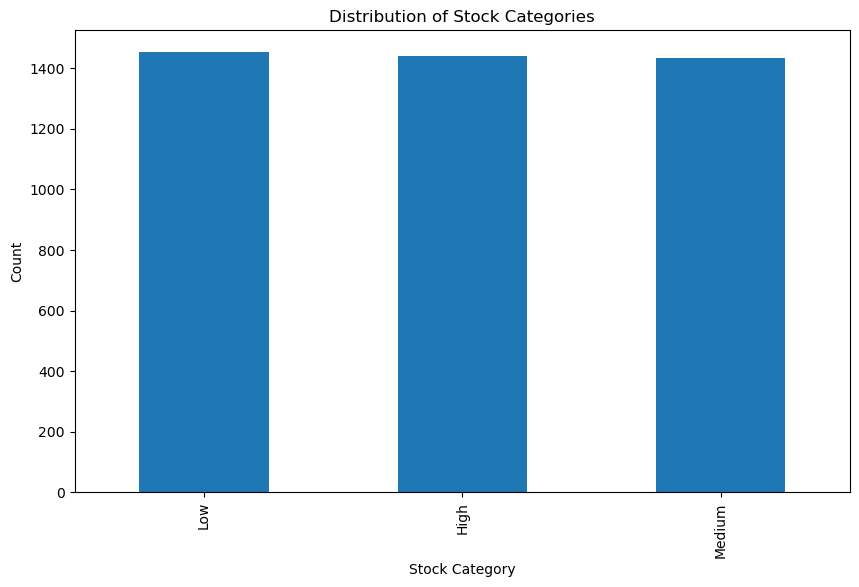

In [46]:
goods_df['StockCategory'].value_counts().plot(kind = 'bar', 
                                              title = 'Distribution of Stock Categories', 
                                              xlabel = 'Stock Category', 
                                              ylabel = 'Count', 
                                              figsize = (10,6))

12. Generate a line plot to analyze the monthly production trends ``ProductionMonth`` by calculating the sum of ``Quantity (liters/kg)`` per ProductionMonth

    Store the line chart in the variable ``monthly_production_plot``.

    Notes:

    Your line chart should:

    - Have a ``Monthly Production Trends`` title
    - Have ``Production Month`` as the X label value
    - Have ``Total Quantity`` as the Y label value
    - Have the default color of the bars
    - Have (10, 6) as the value of figure size
    - Have an ``o`` marker

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_4992\741085253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_production_plot = goods_df.groupby('ProductionMonth')['Quantity (liters/kg)'].sum().plot(title = 'Monthly Production Trends',


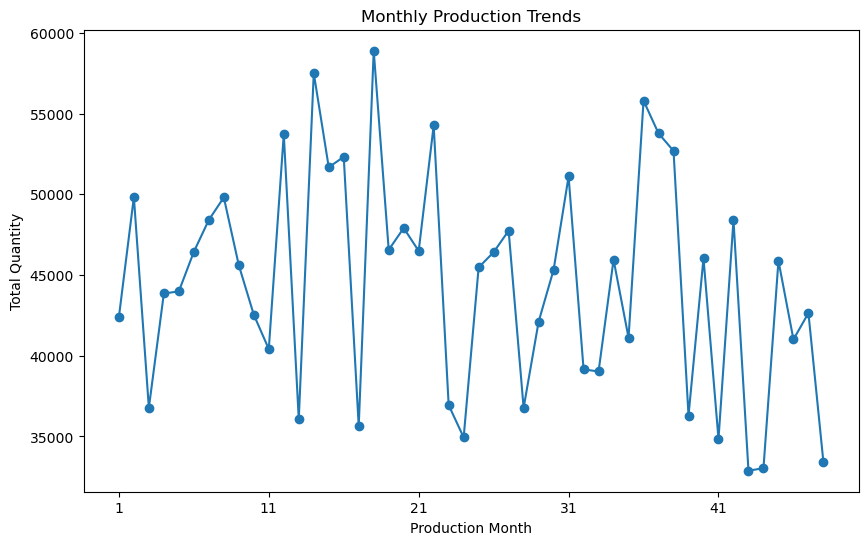

In [52]:
monthly_production_plot = goods_df.groupby('ProductionMonth')['Quantity (liters/kg)'].sum().plot(title = 'Monthly Production Trends',
                                                                       xlabel = 'Production Month',
                                                                       ylabel = 'Total Quantity',
                                                                       figsize = (10,6),
                                                                       marker = 'o')

13. Compute the median quantity sold (``Quantity Sold (liters/kg)``) for each shelf life category (``ShelfLifeCategory``)

    Store the resulting series in the variable ``median_quantity_sold``.

In [56]:
median_quantity_sold = goods_df.groupby(['ShelfLifeCategory'])['Quantity Sold (liters/kg)'].median()
median_quantity_sold

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_4992\1498155051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_quantity_sold = goods_df.groupby(['ShelfLifeCategory'])['Quantity Sold (liters/kg)'].median()


ShelfLifeCategory
Short        191.0
Medium       176.0
Long         188.5
Very Long    200.0
Name: Quantity Sold (liters/kg), dtype: float64

14. Determine the total revenue ``Approx. Total Revenue(INR)`` for each price category (``PriceCategory``)

    Store the resulting series in the variable ``total_revenue``.

In [58]:
total_revenue = goods_df.groupby('PriceCategory')['Approx. Total Revenue(INR)'].sum()
total_revenue

C:\Users\DVadeus\AppData\Local\Temp\ipykernel_4992\1438033671.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue = goods_df.groupby('PriceCategory')['Approx. Total Revenue(INR)'].sum()


PriceCategory
Low               0.00
Medium      1777797.50
High        2878190.36
Premium    54078660.00
Name: Approx. Total Revenue(INR), dtype: float64

# Combining Datasets: Merge and Join